# Data Extraction

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries
key = 'X6K1OB8GGVOKC3MX'

In [2]:
# Getting the daily adjusted data from alpha vantage
ts = TimeSeries(key, output_format='pandas')
tick = 'TSLA'
price, meta = ts.get_daily_adjusted(symbol = tick, outputsize = 'full')

In [3]:
price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2714 entries, 2021-04-09 to 2010-06-29
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   1. open               2714 non-null   float64
 1   2. high               2714 non-null   float64
 2   3. low                2714 non-null   float64
 3   4. close              2714 non-null   float64
 4   5. adjusted close     2714 non-null   float64
 5   6. volume             2714 non-null   float64
 6   7. dividend amount    2714 non-null   float64
 7   8. split coefficient  2714 non-null   float64
dtypes: float64(8)
memory usage: 190.8 KB


In [4]:
price.head()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
date,,,,,,,,
2021-04-09,677.77,680.9700,669.430,677.02,677.02,21437087.0,0.0,1.0
2021-04-08,677.38,689.5499,671.645,683.80,683.80,23924329.0,0.0,1.0
2021-04-07,687.00,691.3800,667.840,670.97,670.97,26309433.0,0.0,1.0
2021-04-06,690.30,696.5500,681.370,691.62,691.62,28271839.0,0.0,1.0
2021-04-05,707.71,708.1600,684.700,691.05,691.05,41842767.0,0.0,1.0


In [5]:
columns = ['open','high','low','close','adjusted close','volume','dividend amount','split coefficient']
price.columns = columns
price.head()

,open,high,low,close,adjusted close,volume,dividend amount,split coefficient
date,,,,,,,,
2021-04-09,677.77,680.9700,669.430,677.02,677.02,21437087.0,0.0,1.0
2021-04-08,677.38,689.5499,671.645,683.80,683.80,23924329.0,0.0,1.0
2021-04-07,687.00,691.3800,667.840,670.97,670.97,26309433.0,0.0,1.0
2021-04-06,690.30,696.5500,681.370,691.62,691.62,28271839.0,0.0,1.0
2021-04-05,707.71,708.1600,684.700,691.05,691.05,41842767.0,0.0,1.0


### Adjusted close data

In [6]:
adjustedclose = pd.DataFrame(price['adjusted close'])
adjustedclose.head()

,adjusted close
date,
2021-04-09,677.02
2021-04-08,683.80
2021-04-07,670.97
2021-04-06,691.62
2021-04-05,691.05


In [7]:
adjustedclose.shape

(2714, 1)

### Extraction of different TI

In [8]:
from alpha_vantage.techindicators import TechIndicators
ta = TechIndicators(key, output_format='pandas')

In [9]:
TI_dataframe = pd.DataFrame()
sma, meta = ta.get_sma(tick, interval='daily',time_period =200, series_type='close')
ema, meta = ta.get_ema(tick, interval='daily',time_period =200, series_type='close')
kama, meta = ta.get_kama(tick, interval='daily',time_period =200,series_type='close')
t3, meta = ta.get_t3(tick, interval='daily',time_period =200, series_type='close')
rsi, meta = ta.get_rsi(tick,interval='daily',time_period =200,series_type='close')

In [10]:
adx, meta = ta.get_adx(tick,interval='daily',time_period =200)
cci, meta = ta.get_cci(tick,interval='daily',time_period =200)
roc, meta = ta.get_roc(tick,interval='daily',time_period =200,series_type='close')
ad, meta = ta.get_ad(tick, interval='daily')
obv, meta = ta.get_obv(tick, interval='daily')

In [11]:
TIs = [sma,ema,kama,t3,rsi,adx,cci,roc,ad,obv]
TI_dataframe = pd.concat(TIs,axis=1)
TI_dataframe.head()

,SMA,EMA,KAMA,T3,RSI,ADX,CCI,ROC,Chaikin A/D,OBV
date,,,,,,,,,,
2010-06-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.590845e+07,93831500.0
2010-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.231841e+06,7896000.0
2010-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.374217e+07,-33198000.0
2010-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.370427e+07,-58897000.0
2010-07-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.342790e+07,-93231500.0


### Combined Dataset

In [12]:
main_data = pd.concat([adjustedclose,TI_dataframe],axis=1)
main_data = main_data.loc['2016-03-11':]  # Around 5 years of data
main_data.head()


,adjusted close,SMA,EMA,KAMA,T3,RSI,ADX,CCI,ROC,Chaikin A/D,OBV
date,,,,,,,,,,,
2016-03-11,41.500,45.9139,43.1406,43.5368,48.8544,49.6214,6.7083,-60.9634,-16.1379,3.572459e+08,1.358732e+09
2016-03-14,43.030,45.8776,43.1395,43.5329,48.8138,50.0694,6.6977,-41.7969,-14.4363,3.670758e+08,1.379061e+09
2016-03-15,43.668,45.8452,43.1447,43.5339,48.7725,50.2548,6.6857,-35.5456,-12.9426,3.802958e+08,1.394963e+09
2016-03-16,44.386,45.8177,43.1571,43.5397,48.7304,50.4629,6.6715,-23.4376,-11.0323,3.937680e+08,1.412546e+09
2016-03-17,45.276,45.7957,43.1782,43.5504,48.6878,50.7196,6.6535,-10.7869,-8.8464,4.032475e+08,1.431461e+09


In [13]:
main_data.shape

(1279, 11)

### Shift the adjusted close to 5 days ahead
This is because we are trying to predict the price for 5 days later

In [14]:
future_adjustedclose = pd.DataFrame(main_data['adjusted close'])
future_adjustedclose = future_adjustedclose[4:]
future_adjustedclose

,adjusted close
date,
2016-03-17,45.276
2016-03-18,46.548
2016-03-21,47.664
2016-03-22,46.848
2016-03-23,44.516
...,...
2021-04-05,691.050
2021-04-06,691.620
2021-04-07,670.970


### Cut the last 5 days of data of TI
This is due to us trying to predict price 5 days hence we need to cut the last 5 days to make the size of the data equal.

In [15]:
TI_data = pd.DataFrame(main_data.iloc[:,1:])
TI_data = TI_data[:-4]
TI_data.head()

,SMA,EMA,KAMA,T3,RSI,ADX,CCI,ROC,Chaikin A/D,OBV
date,,,,,,,,,,
2016-03-11,45.9139,43.1406,43.5368,48.8544,49.6214,6.7083,-60.9634,-16.1379,3.572459e+08,1.358732e+09
2016-03-14,45.8776,43.1395,43.5329,48.8138,50.0694,6.6977,-41.7969,-14.4363,3.670758e+08,1.379061e+09
2016-03-15,45.8452,43.1447,43.5339,48.7725,50.2548,6.6857,-35.5456,-12.9426,3.802958e+08,1.394963e+09
2016-03-16,45.8177,43.1571,43.5397,48.7304,50.4629,6.6715,-23.4376,-11.0323,3.937680e+08,1.412546e+09
2016-03-17,45.7957,43.1782,43.5504,48.6878,50.7196,6.6535,-10.7869,-8.8464,4.032475e+08,1.431461e+09


In [16]:
TI_data.shape

(1275, 10)

### Classification of price increase/decrease
We classify the adjusted price into 1 for price increase and -1 for price decrease in the next 5 days. 

Price increase/decrease = (price 5 days later - price today > 0) ? 1 : -1

In [17]:
y = np.where(main_data['adjusted close'].shift(-5) > main_data['adjusted close'], 1, -1)
y = pd.DataFrame(y)
columns = ['price increase/decrease']
y.columns = columns
y.index = main_data.index.date
pchange = y[:-4]
pchange.head()

,price increase/decrease
2016-03-11,1
2016-03-14,1
2016-03-15,1
2016-03-16,1
2016-03-17,1


In [18]:
pchange.value_counts()

price increase/decrease
 1                         730
-1                         545
dtype: int64

## Train and test data split

In [19]:
from sklearn.model_selection import train_test_split

#### Split for regression

In [20]:
Xreg_train, Xreg_test, yreg_train, yreg_test = train_test_split(TI_data, future_adjustedclose, test_size = 0.25,random_state=42)
print("Train Set :", yreg_train.shape, Xreg_train.shape)
print("Test Set  :", yreg_test.shape, Xreg_test.shape)

Train Set : (956, 1) (956, 10)
Test Set  : (319, 1) (319, 10)


#### Split for classification

In [21]:
Xcls_train, Xcls_test, ycls_train, ycls_test = train_test_split(TI_data, pchange, test_size = 0.25,random_state=42)
print("Train Set :", ycls_train.shape, Xcls_train.shape)
print("Test Set  :", ycls_test.shape, Xcls_test.shape)

Train Set : (956, 1) (956, 10)
Test Set  : (319, 1) (319, 10)


#### Test if X train and test for both is equal

In [22]:
from pandas._testing import assert_frame_equal
print("Any difference in X train:",assert_frame_equal(Xreg_train,Xcls_train))
print("Any difference in X test:",assert_frame_equal(Xreg_test,Xcls_test))

Any difference in X train: None
Any difference in X test: None


# Univariate regression

In [23]:
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set()
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [24]:
# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

Variable 0
Intercept of Regression 	: b =  [-31.60744]
Coefficients of Regression 	: a =  [[1.85058717]]



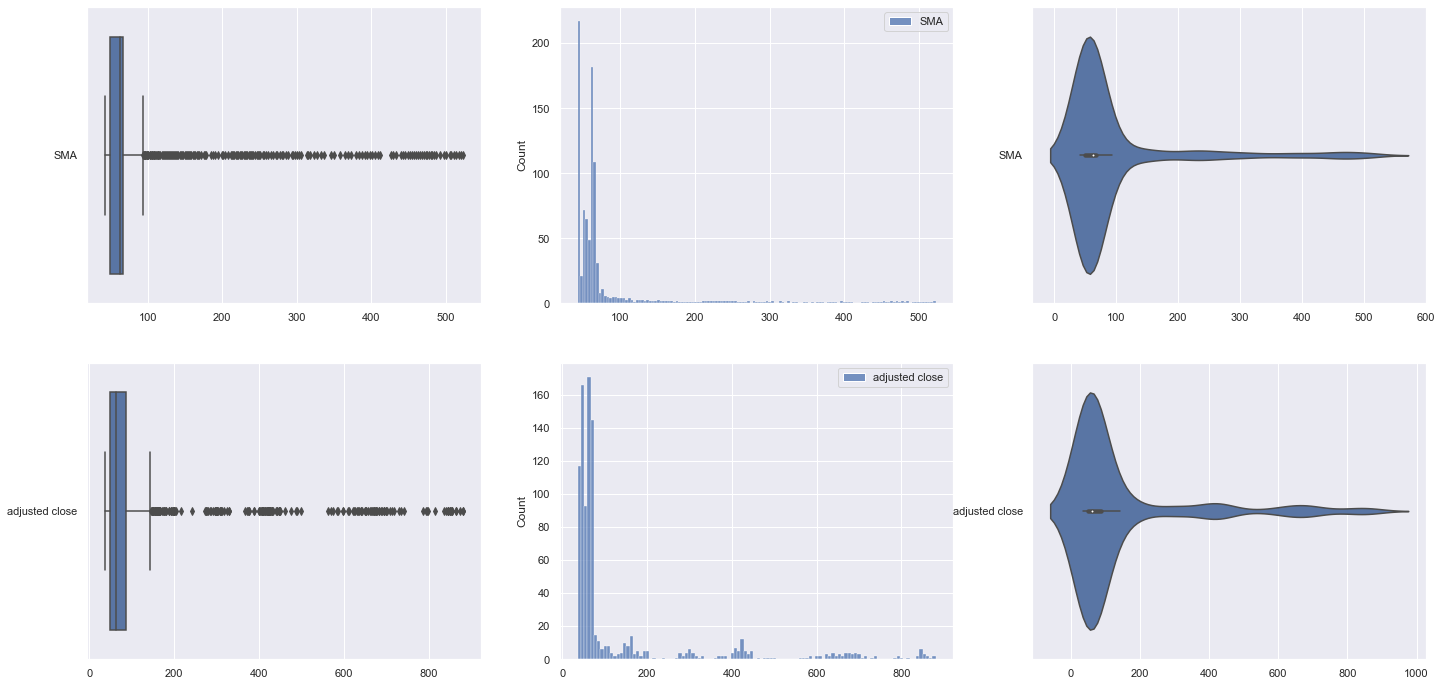

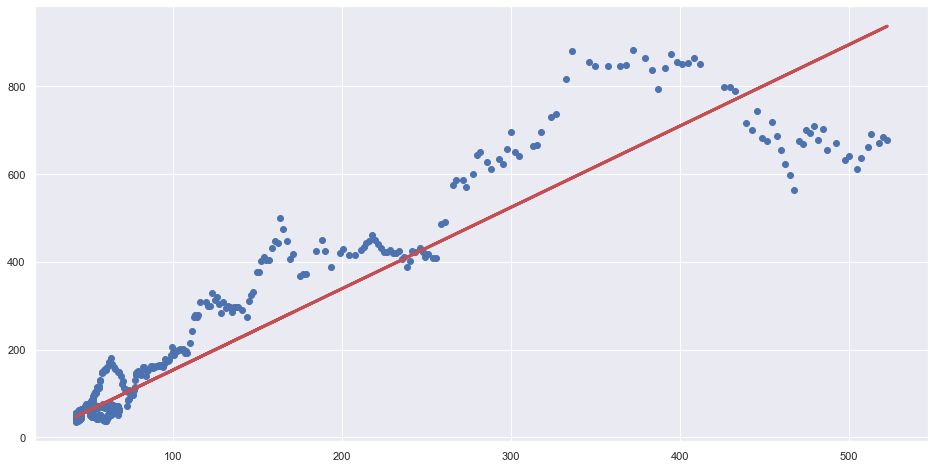

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.901977266894747
Mean Squared Error (MSE) 	: 3453.0368970269697

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9080902013854801
Mean Squared Error (MSE) 	: 3207.9376968127494



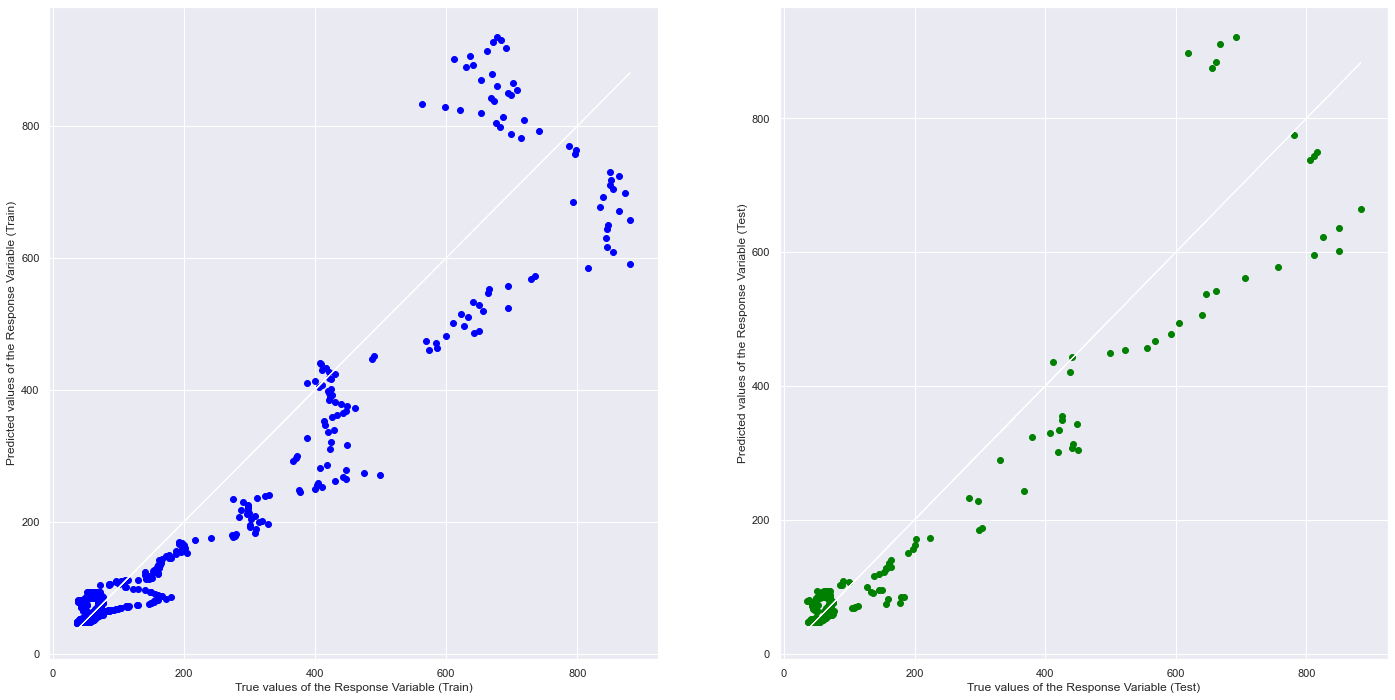

Variable 1
Intercept of Regression 	: b =  [-24.35193984]
Coefficients of Regression 	: a =  [[1.66275868]]



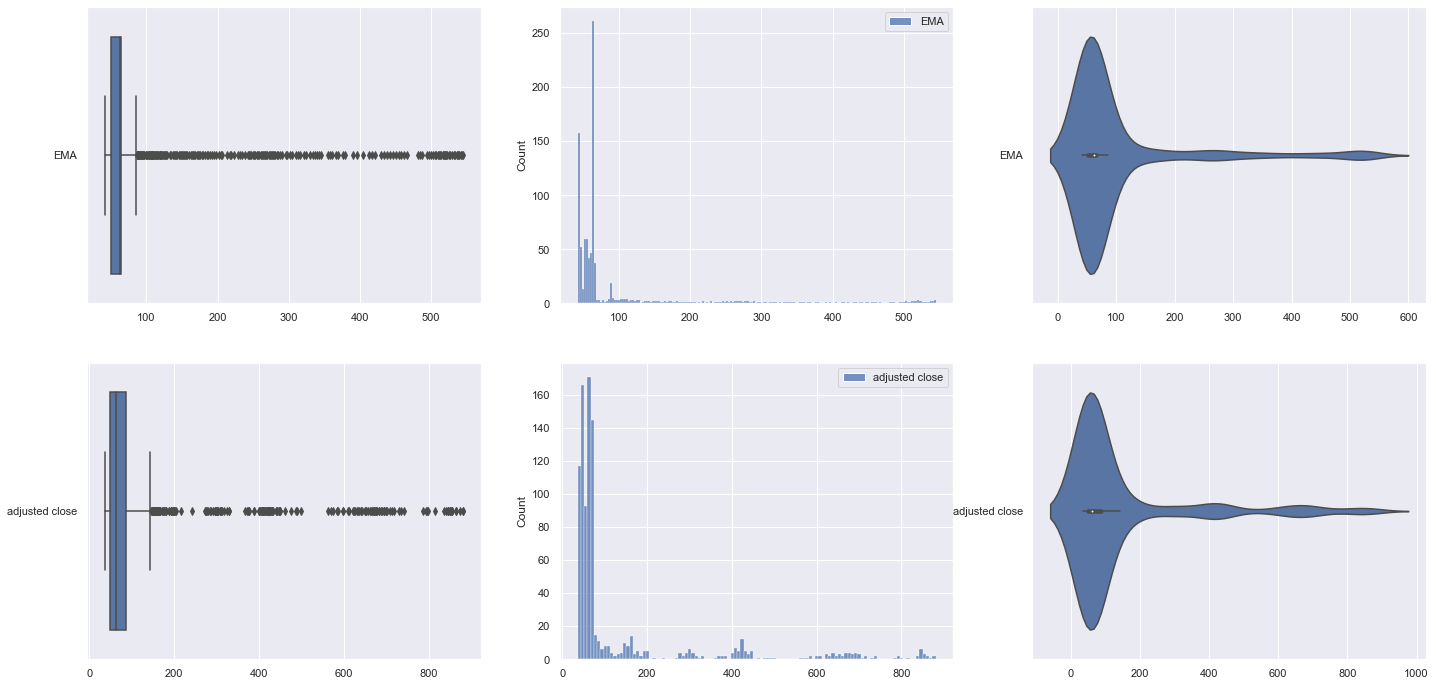

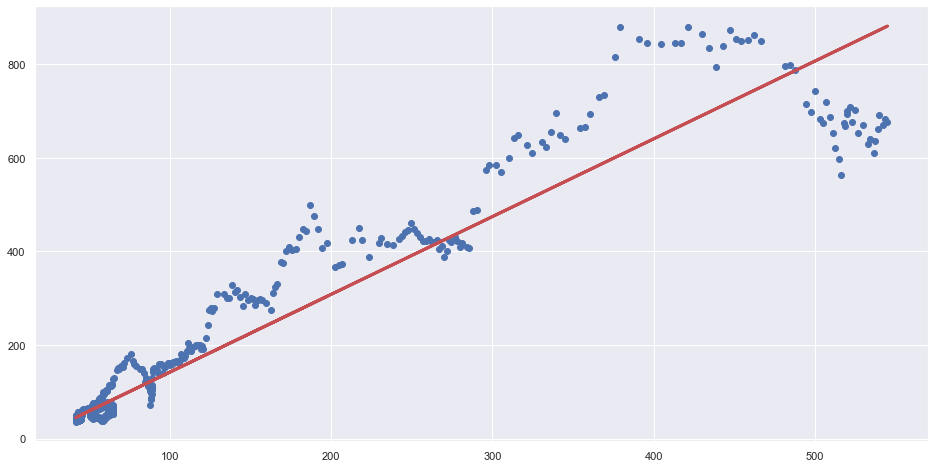

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9229600368195029
Mean Squared Error (MSE) 	: 2713.8789848086753

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9312163349510589
Mean Squared Error (MSE) 	: 2400.763741860498



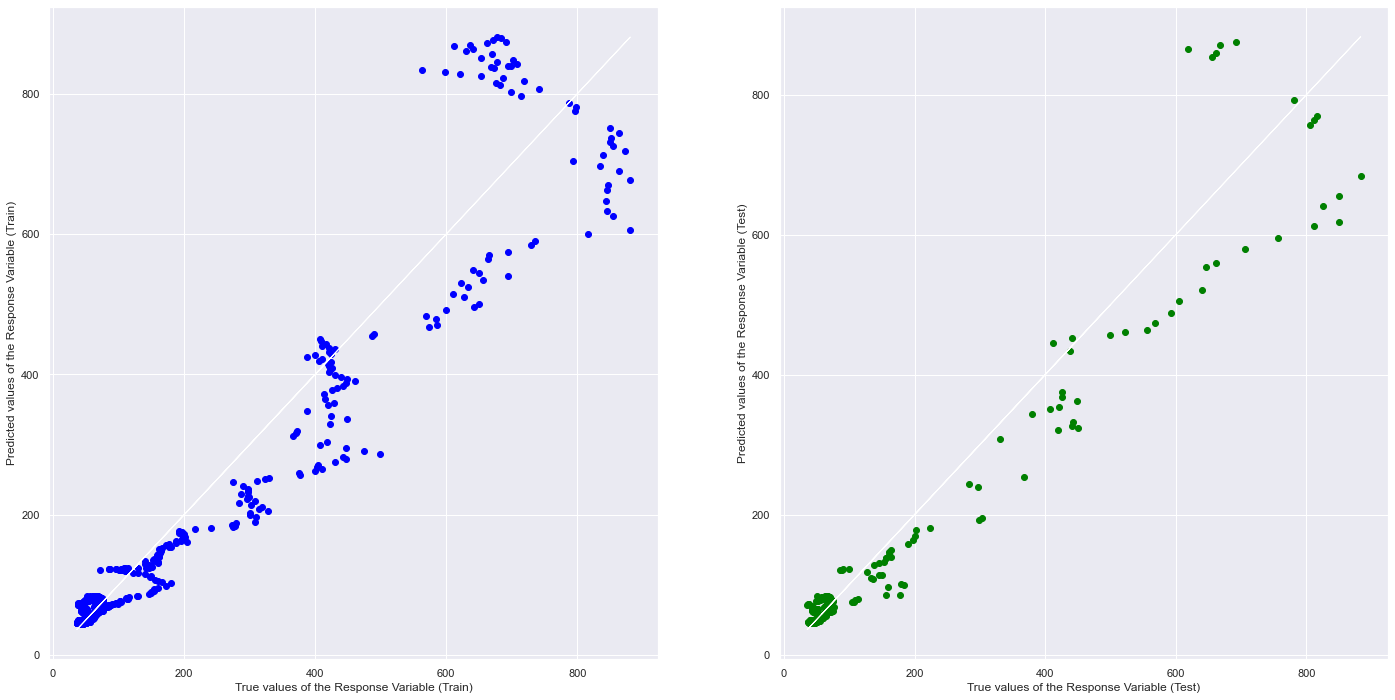

Variable 2
Intercept of Regression 	: b =  [2.31802438]
Coefficients of Regression 	: a =  [[1.0711578]]



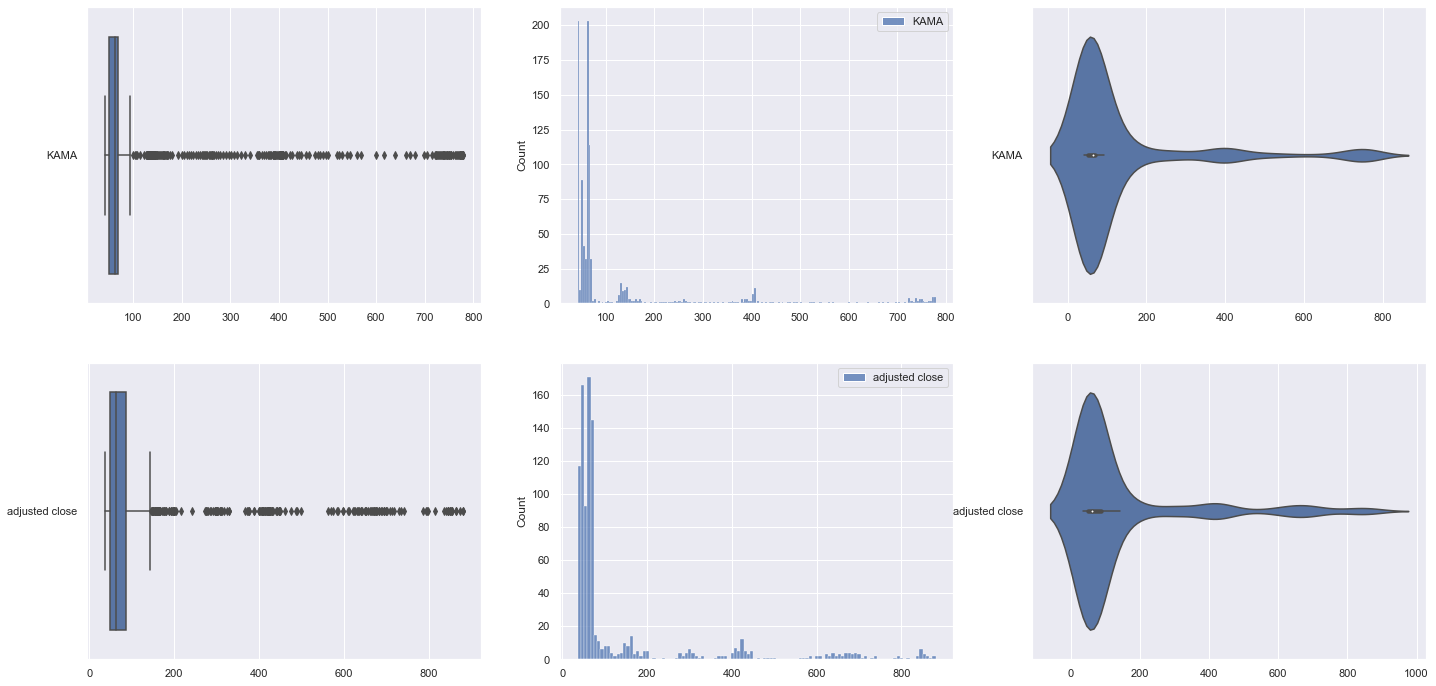

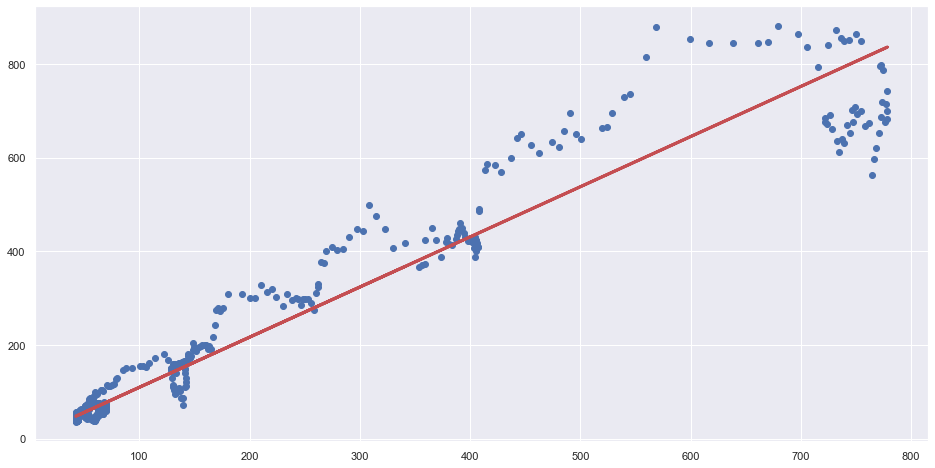

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9478240041615122
Mean Squared Error (MSE) 	: 1837.9985240359413

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9544493312585036
Mean Squared Error (MSE) 	: 1589.8599450069075



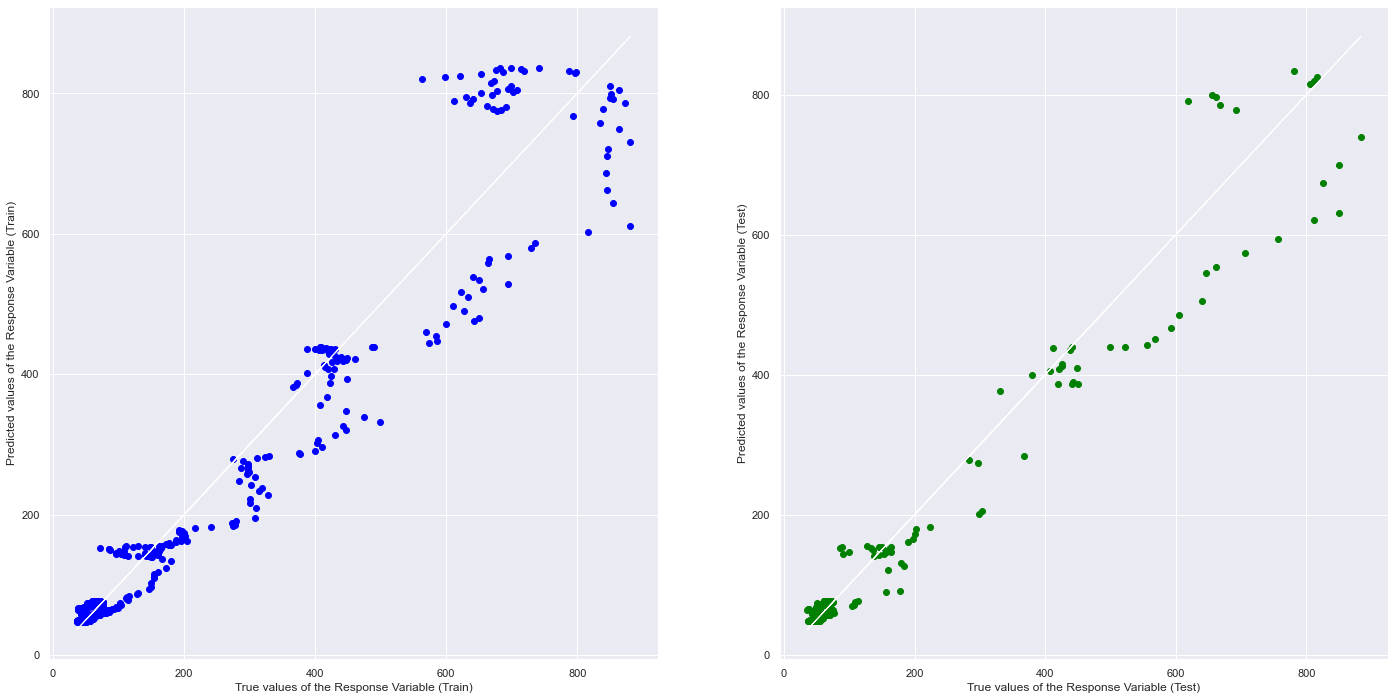

Variable 3
Intercept of Regression 	: b =  [-60.42342601]
Coefficients of Regression 	: a =  [[2.47431098]]



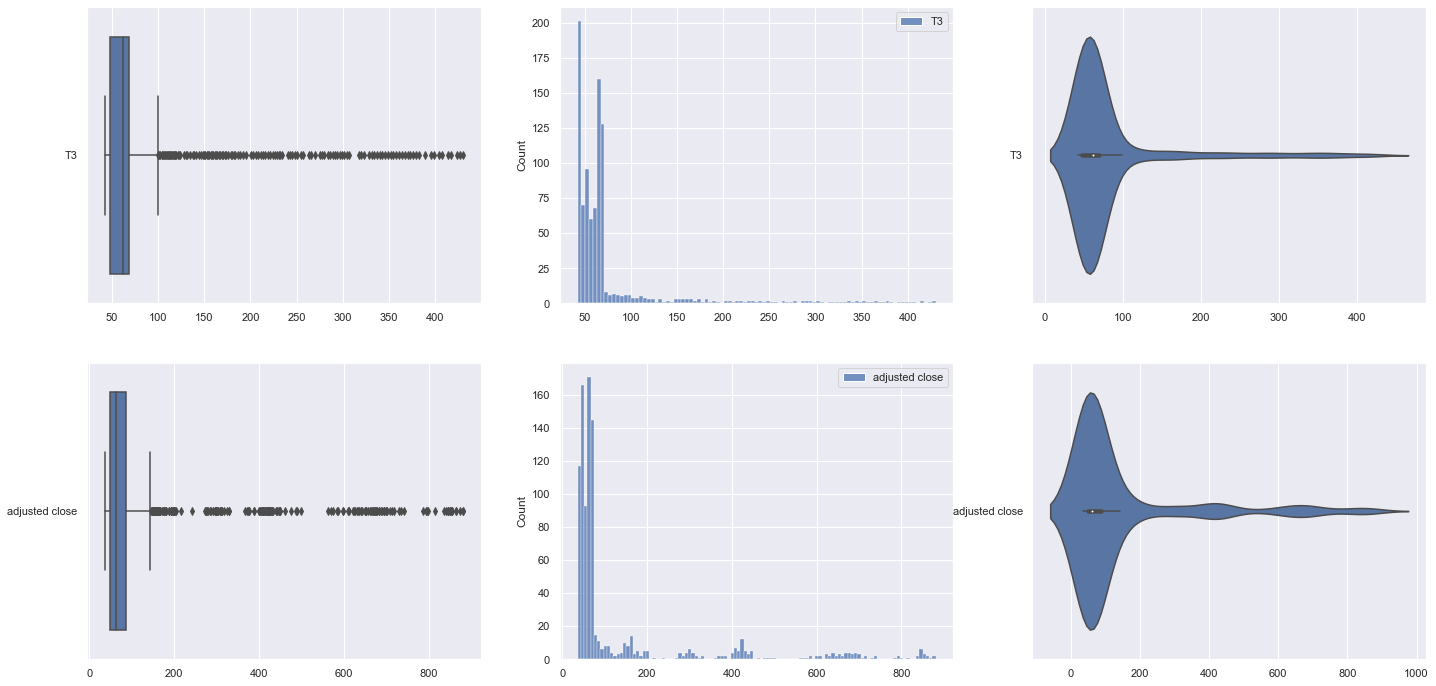

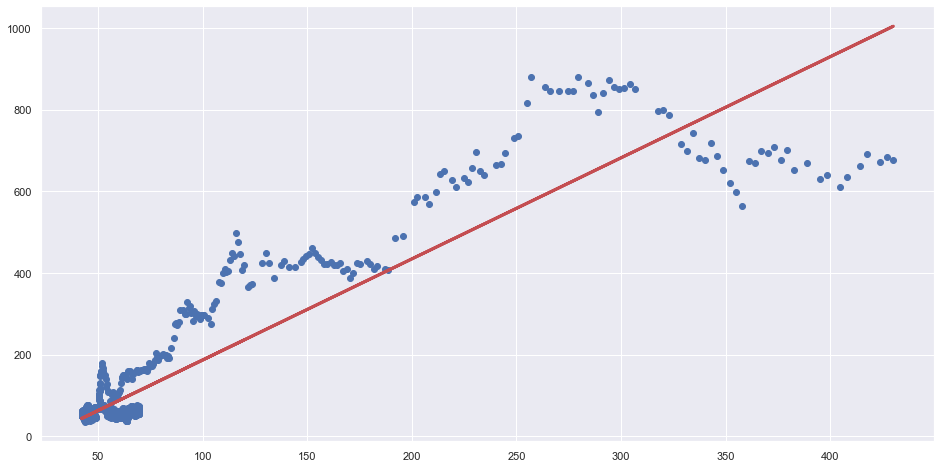

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8504898130291538
Mean Squared Error (MSE) 	: 5266.780222679449

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8551431341160187
Mean Squared Error (MSE) 	: 5055.9549440462



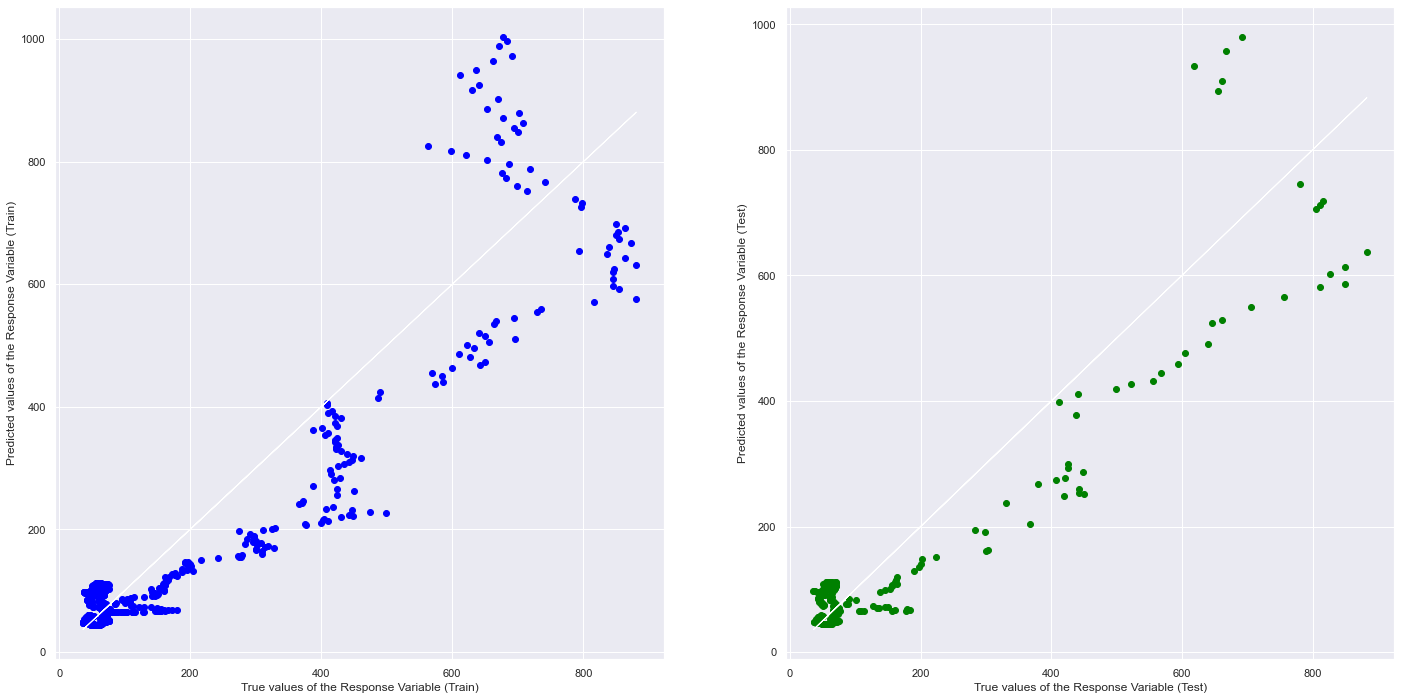

Variable 4
Intercept of Regression 	: b =  [-1498.09020374]
Coefficients of Regression 	: a =  [[30.95948513]]



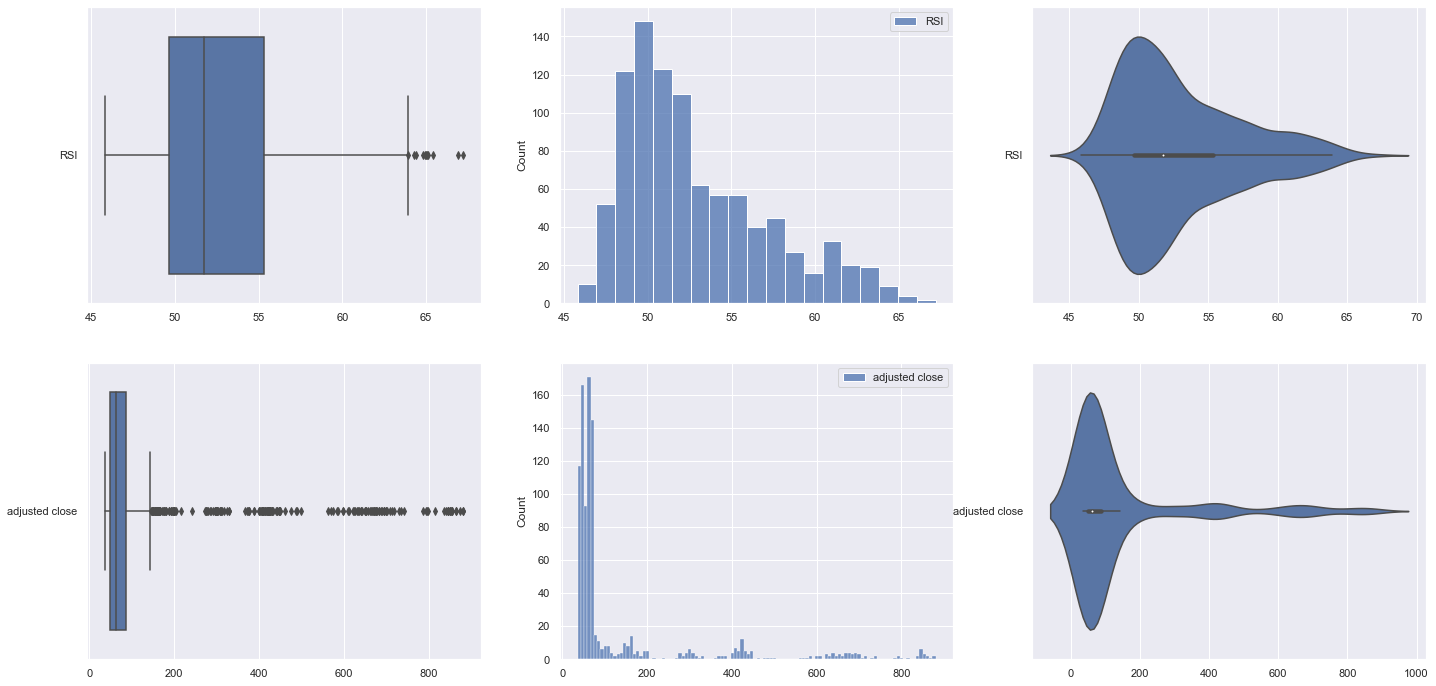

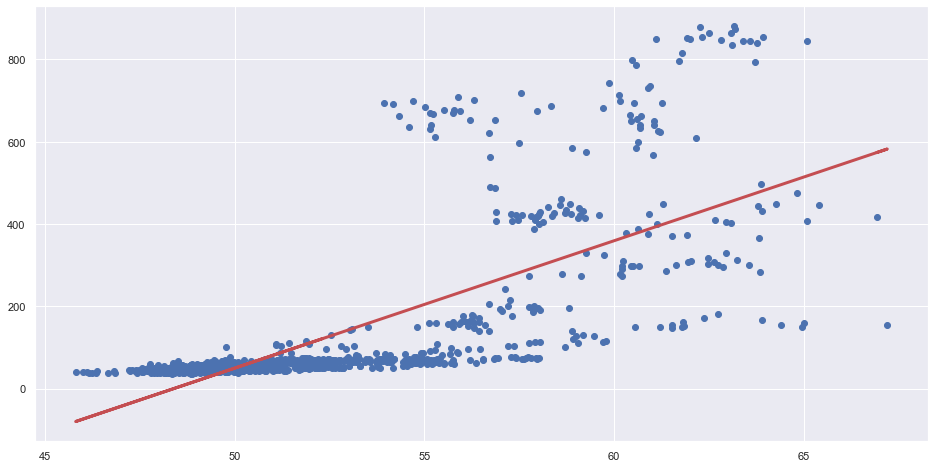

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5085231041754648
Mean Squared Error (MSE) 	: 17313.206860862912

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.522834819969673
Mean Squared Error (MSE) 	: 16654.548173320727



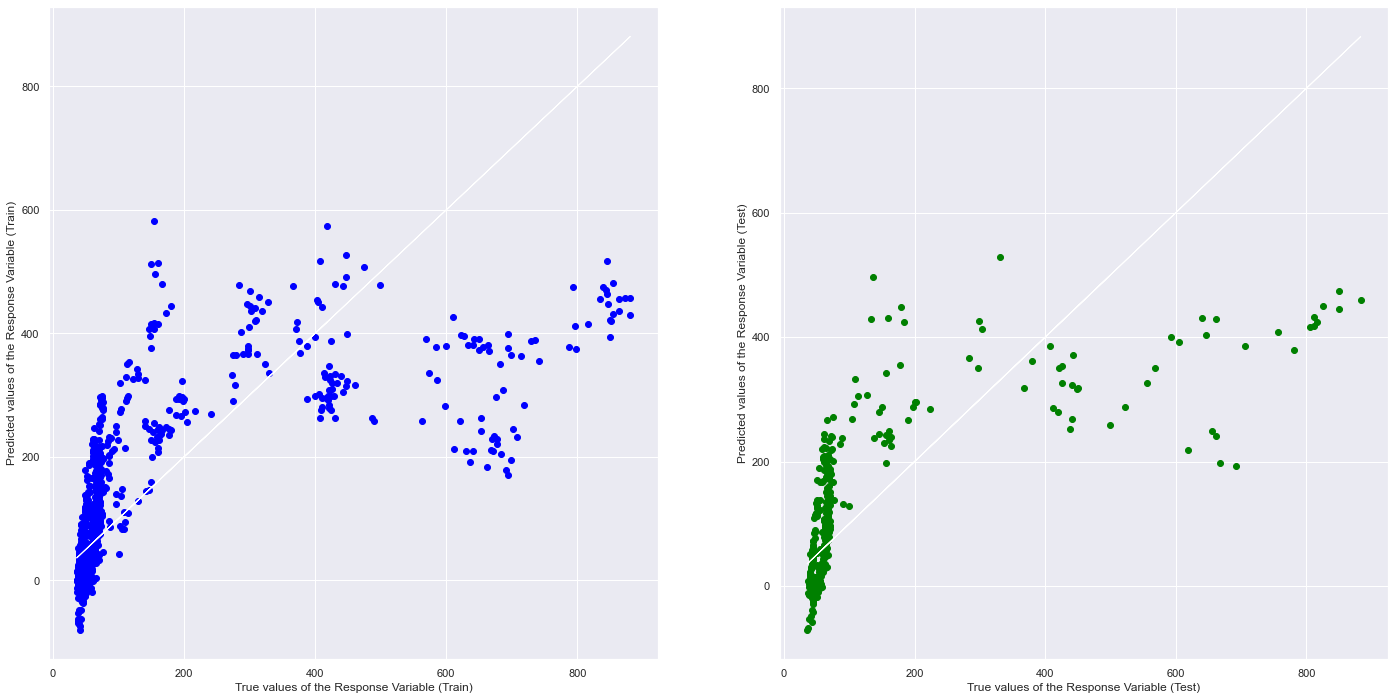

Variable 5
Intercept of Regression 	: b =  [-172.56463413]
Coefficients of Regression 	: a =  [[45.65127857]]



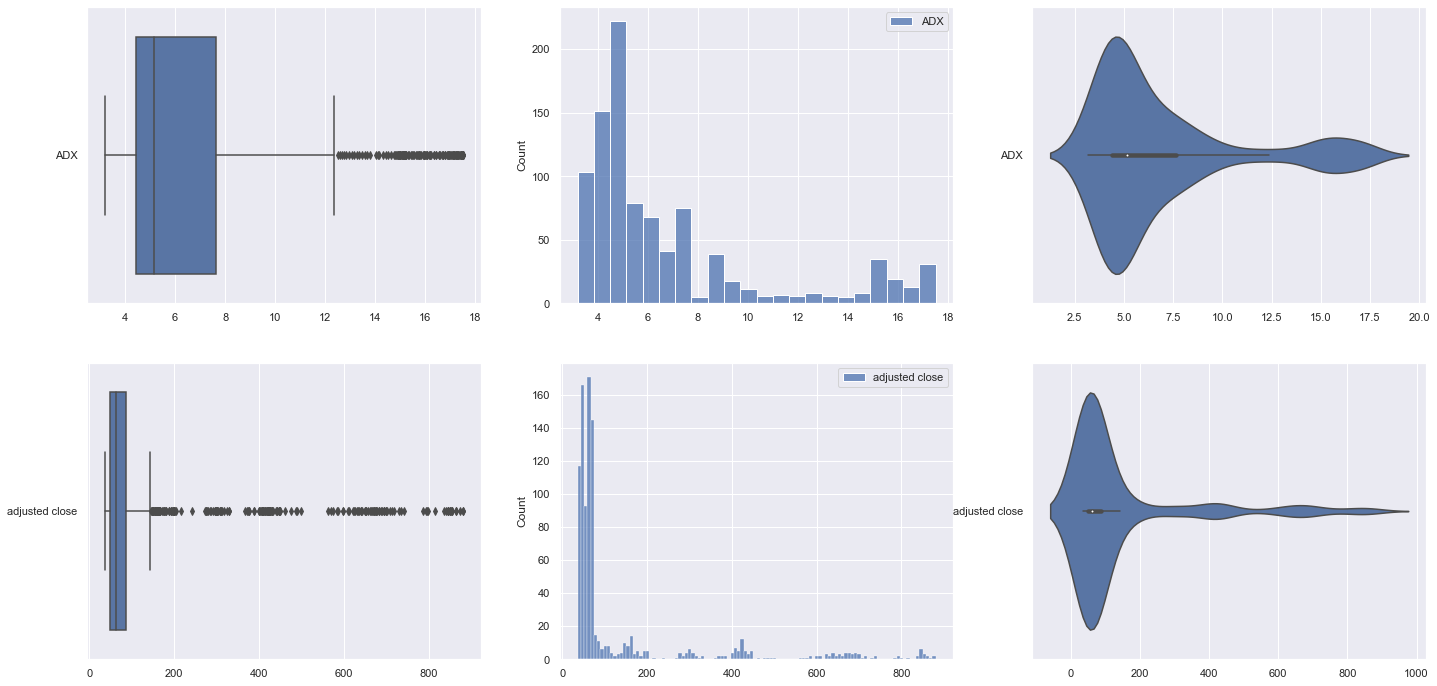

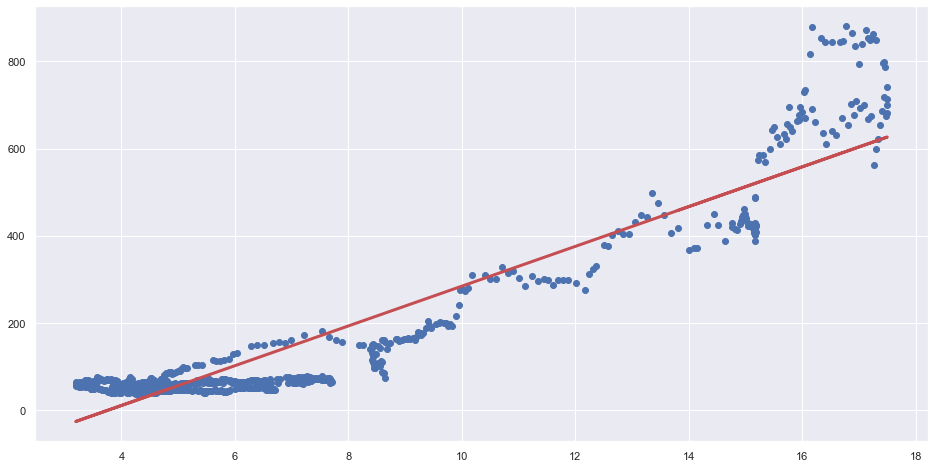

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8650880058852424
Mean Squared Error (MSE) 	: 4752.531160598484

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8540772350482206
Mean Squared Error (MSE) 	: 5093.1581351327995



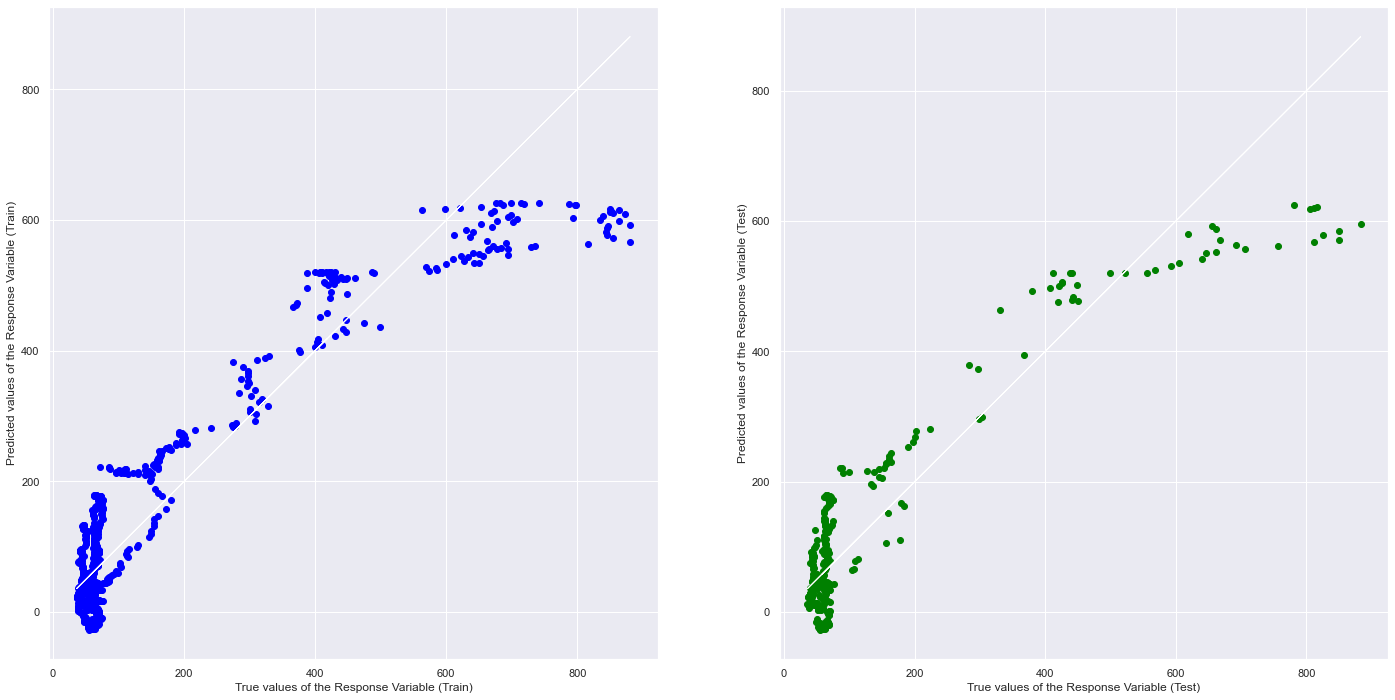

Variable 6
Intercept of Regression 	: b =  [109.46917202]
Coefficients of Regression 	: a =  [[0.63663336]]



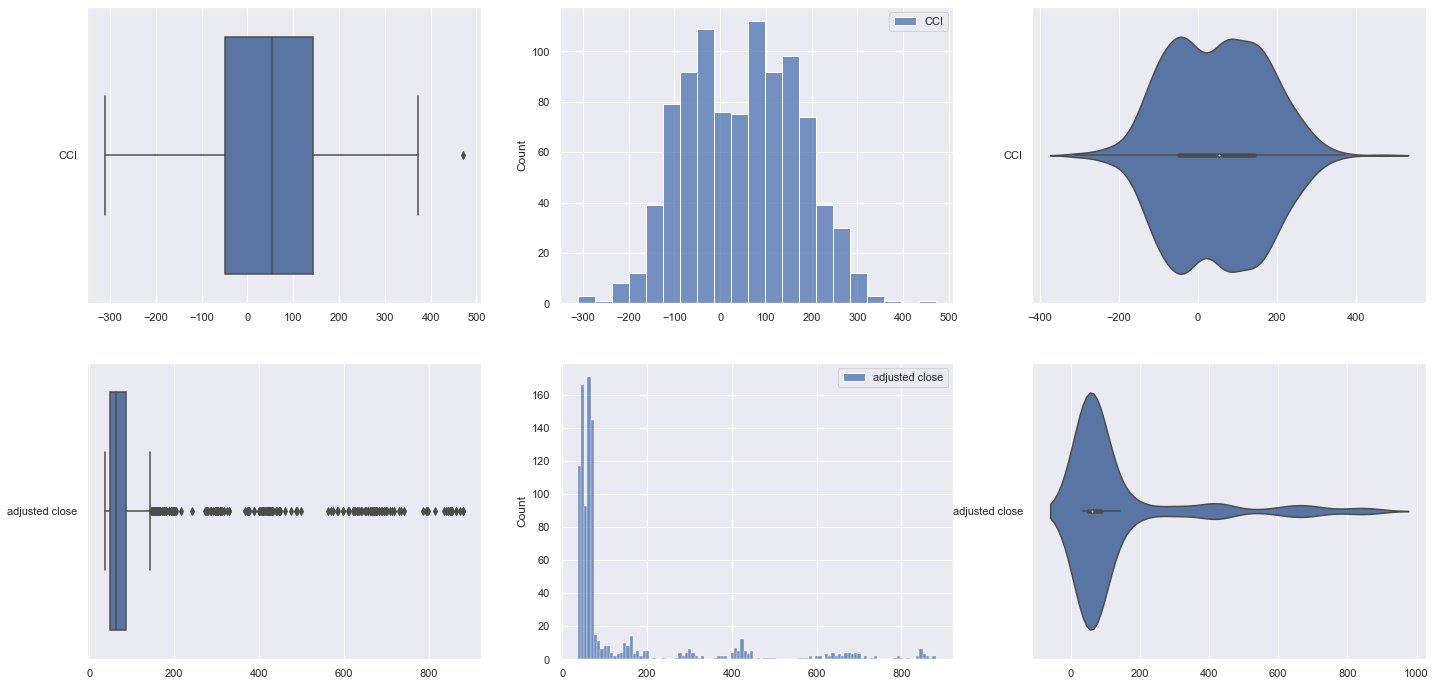

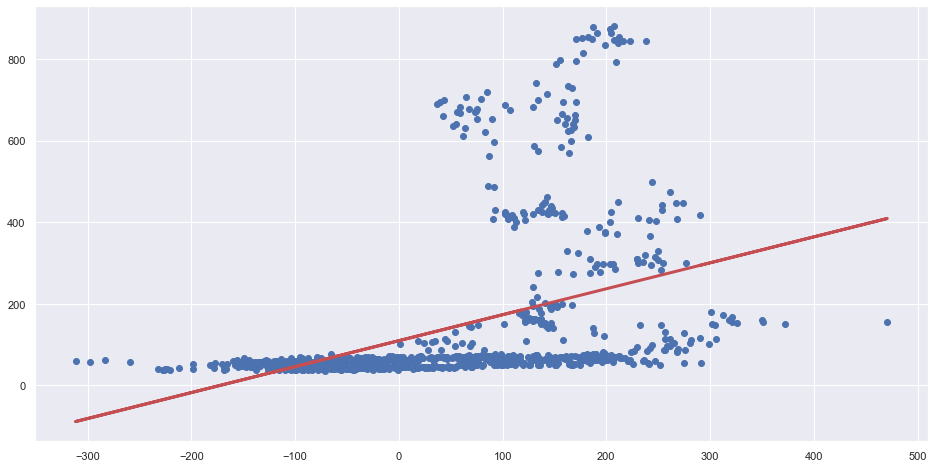

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.17134406017465176
Mean Squared Error (MSE) 	: 29190.978913891842

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.16903609437119027
Mean Squared Error (MSE) 	: 29003.223570726954



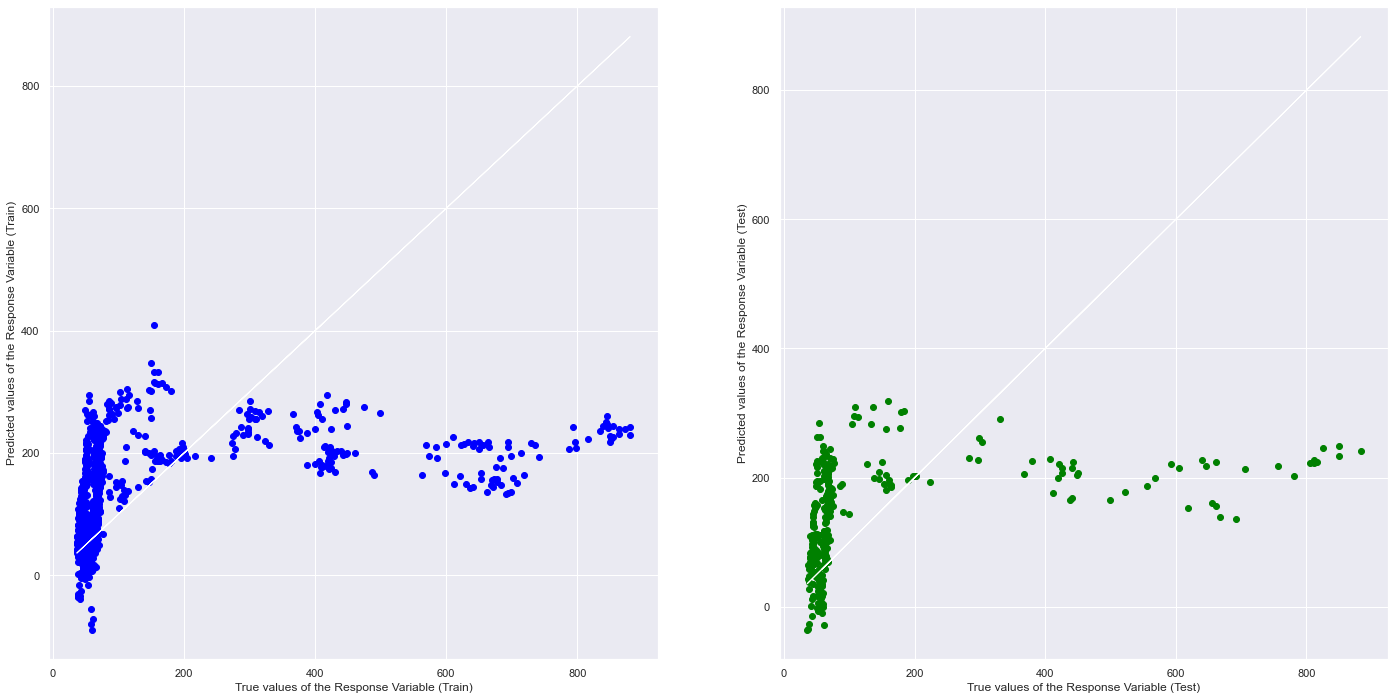

Variable 7
Intercept of Regression 	: b =  [54.79274147]
Coefficients of Regression 	: a =  [[0.942553]]



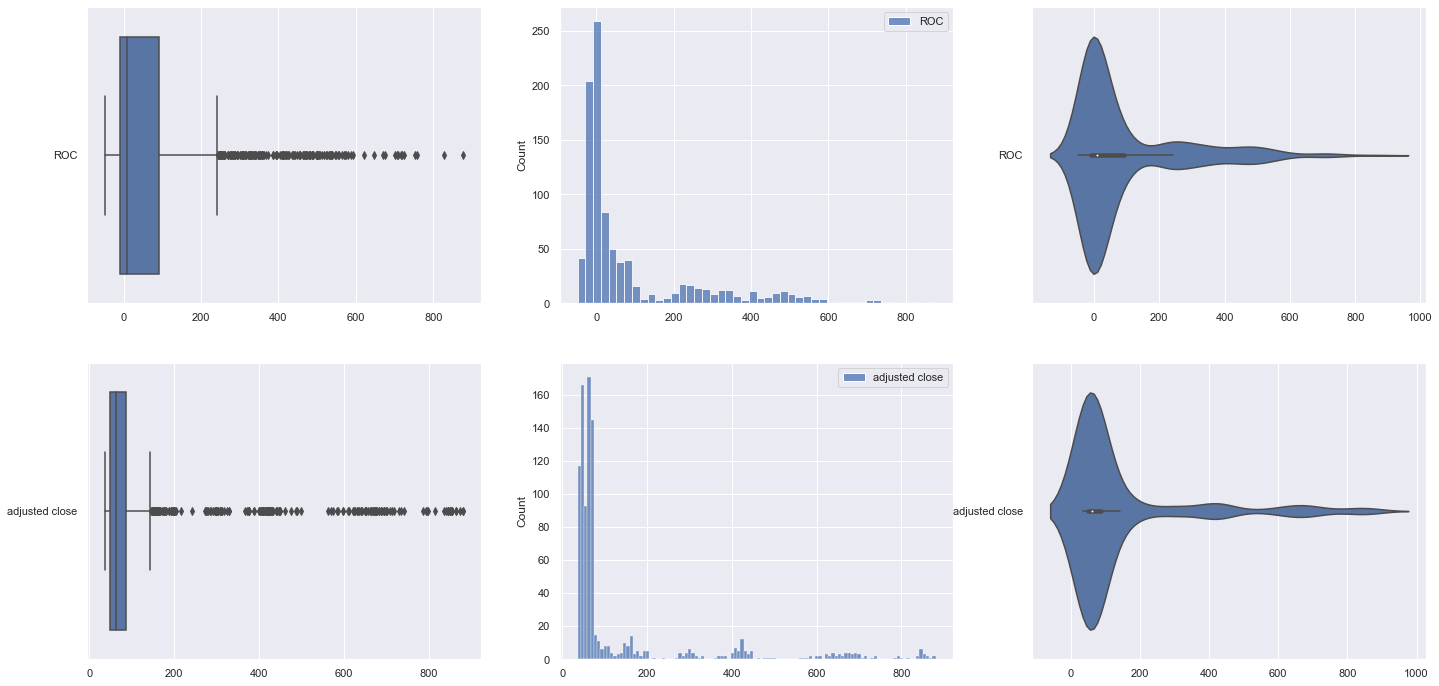

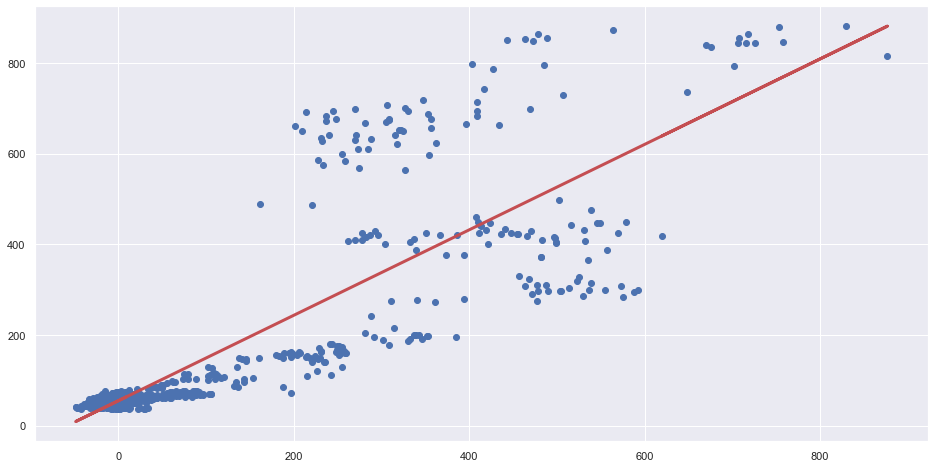

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7201165111642995
Mean Squared Error (MSE) 	: 9859.427330806779

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.753865996204427
Mean Squared Error (MSE) 	: 8590.841903101864



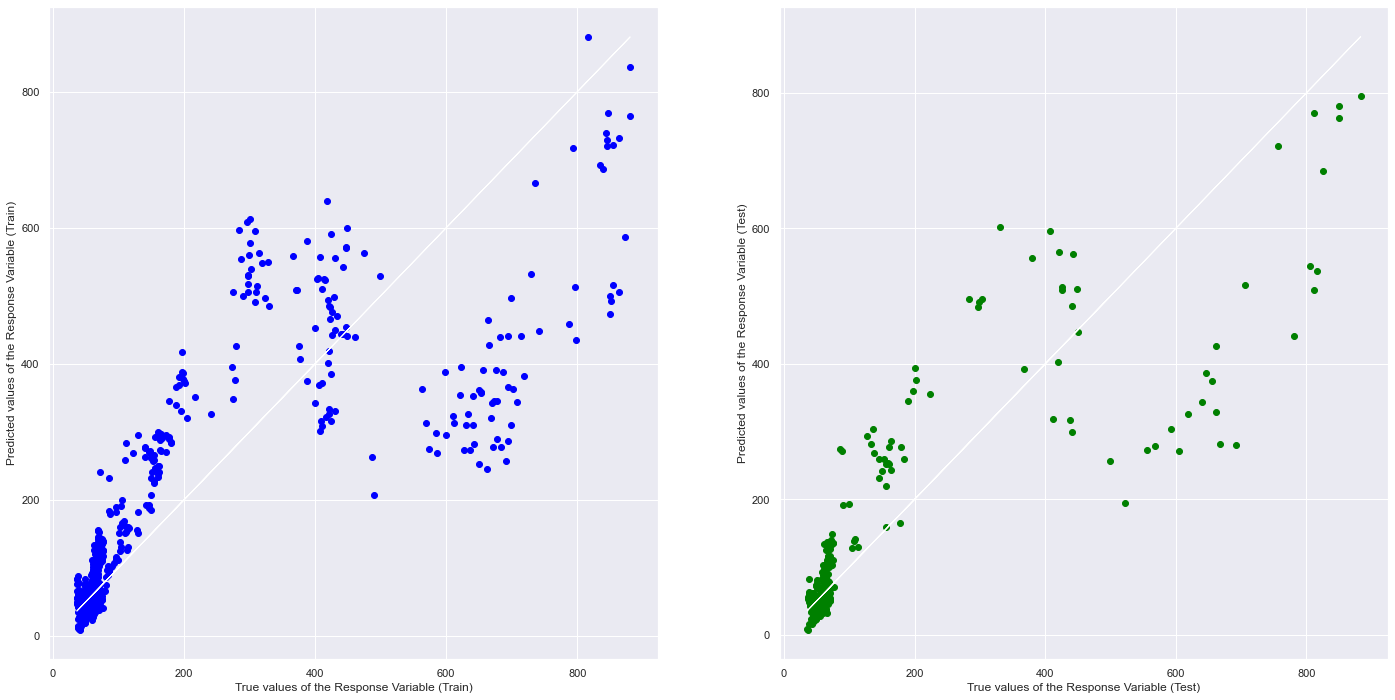

Variable 8
Intercept of Regression 	: b =  [-76.21366623]
Coefficients of Regression 	: a =  [[1.67677246e-07]]



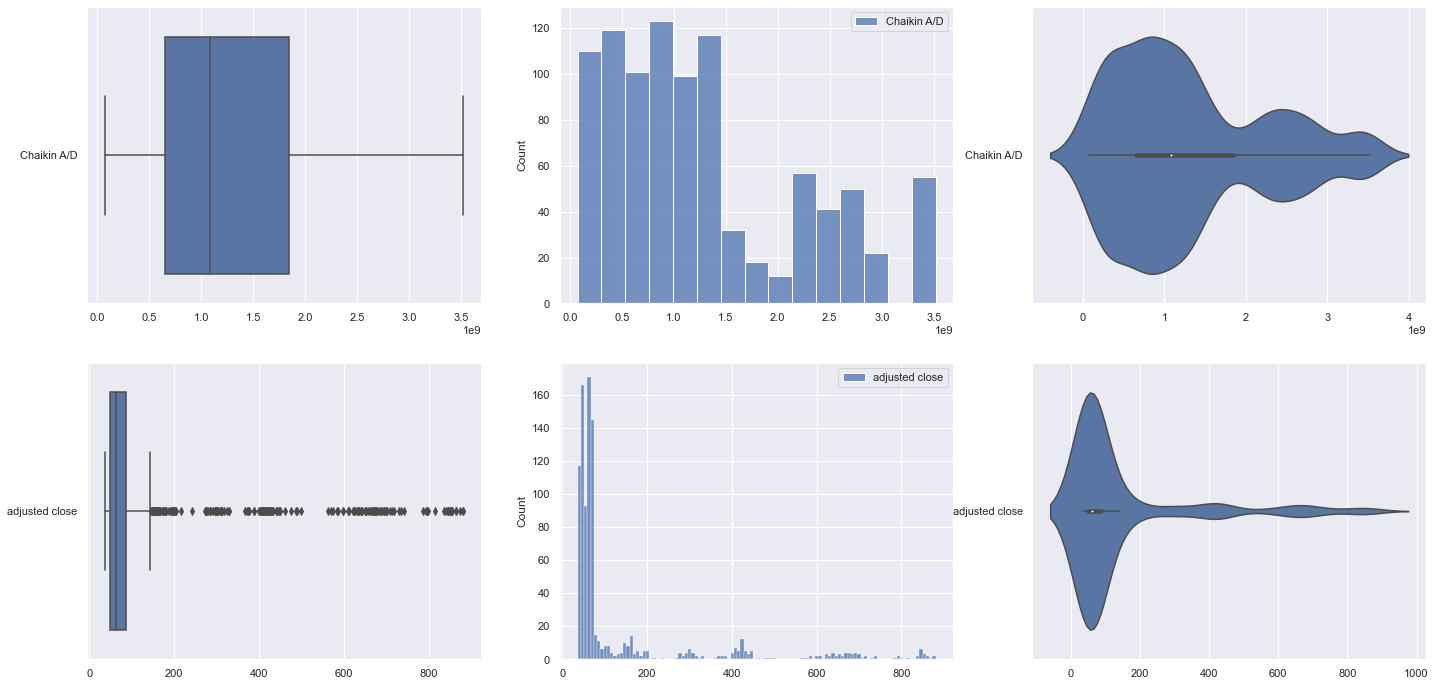

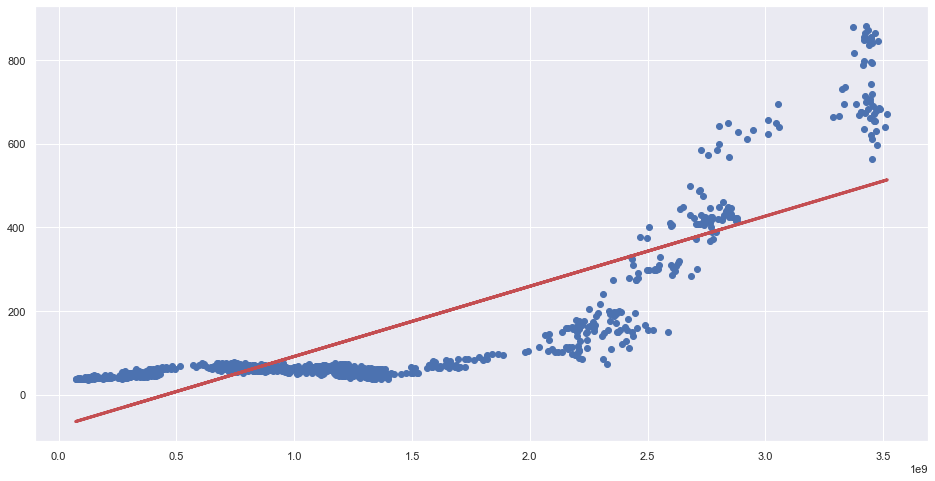

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6943229467093395
Mean Squared Error (MSE) 	: 10768.054614981607

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.6824970054132709
Mean Squared Error (MSE) 	: 11081.841550513367



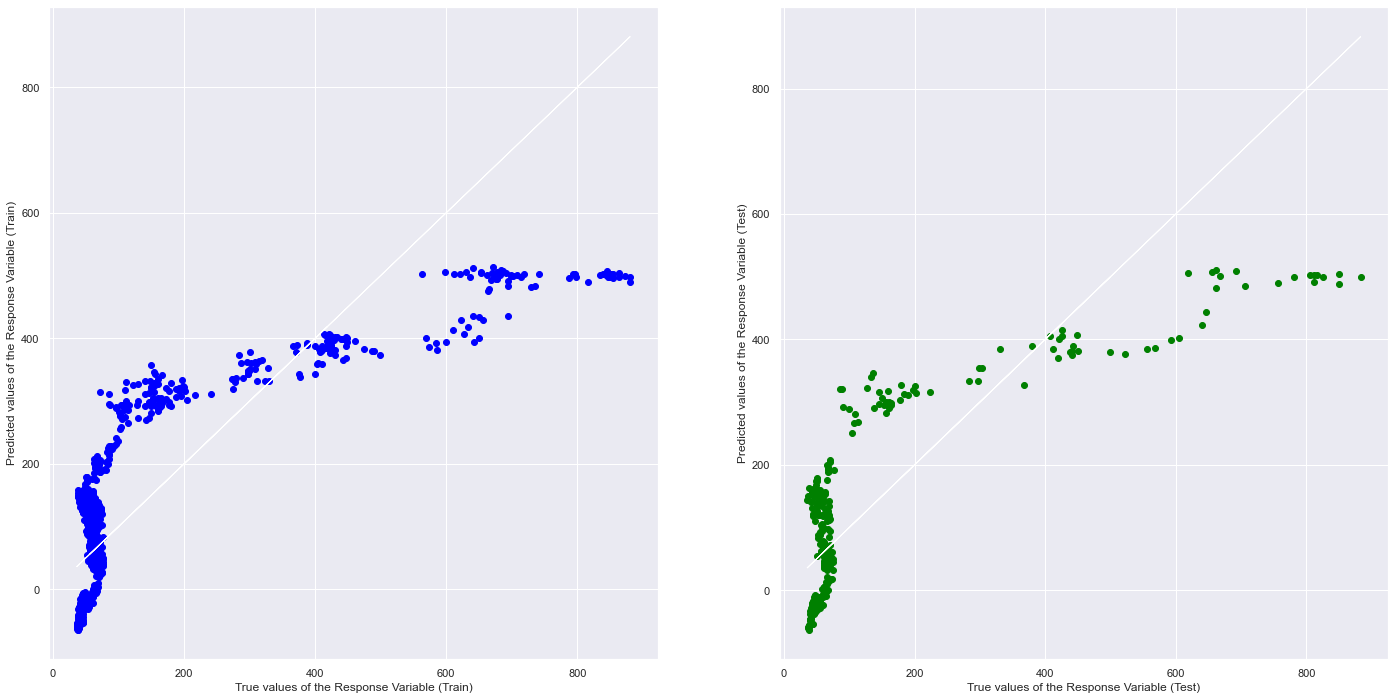

Variable 9
Intercept of Regression 	: b =  [-154.25661755]
Coefficients of Regression 	: a =  [[1.40678053e-07]]



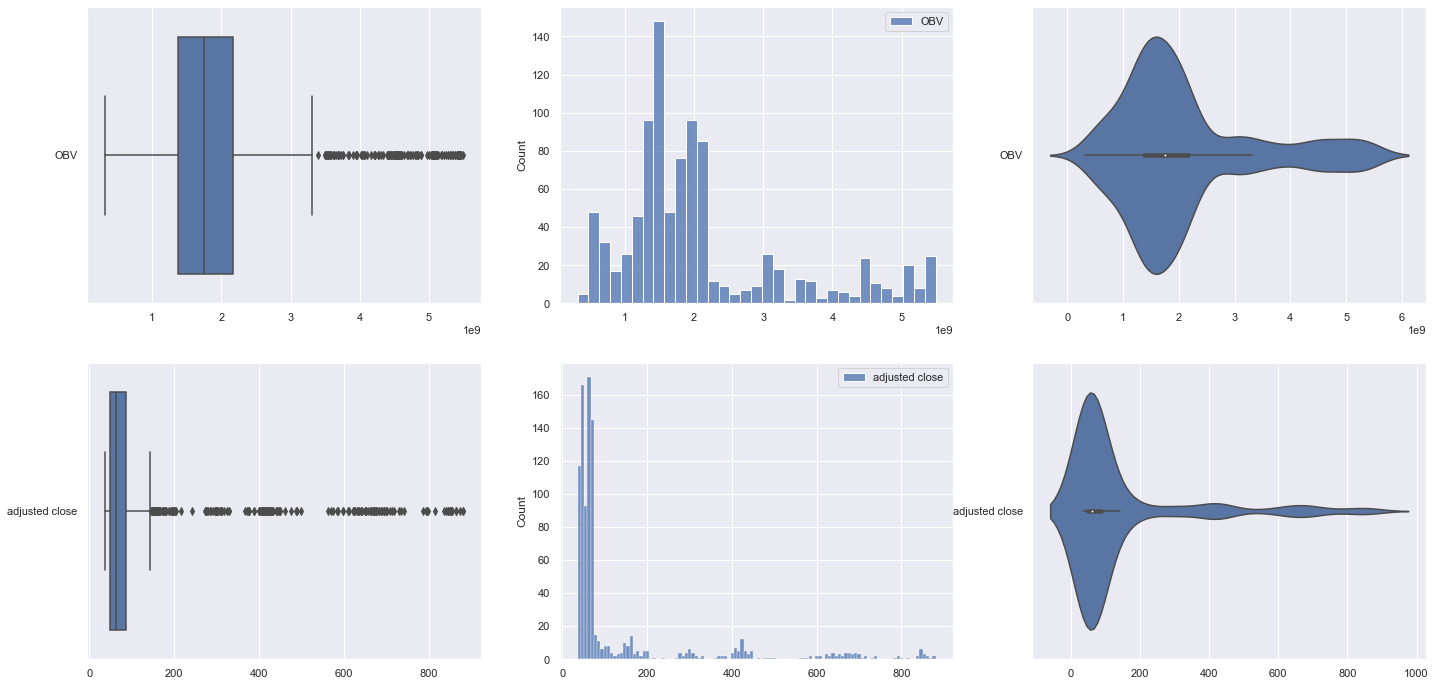

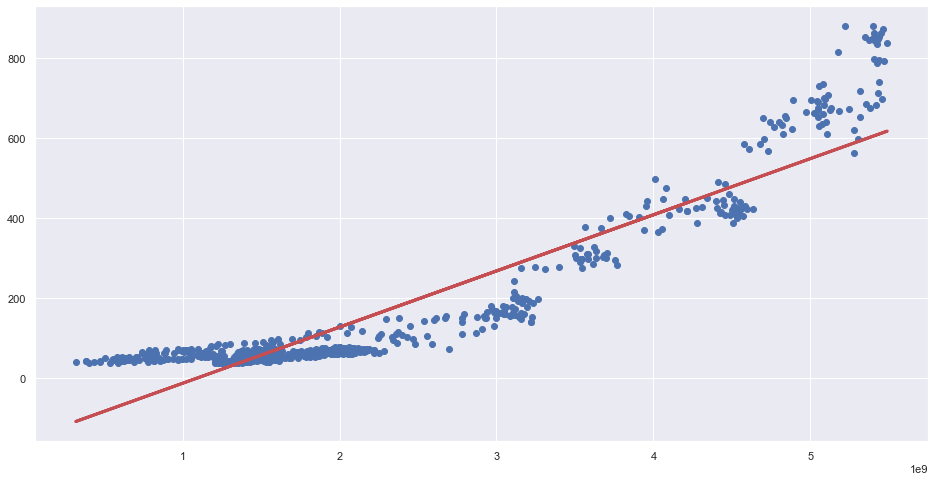

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8447192623475934
Mean Squared Error (MSE) 	: 5470.058827431231

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8329743250146786
Mean Squared Error (MSE) 	: 5829.715299108051



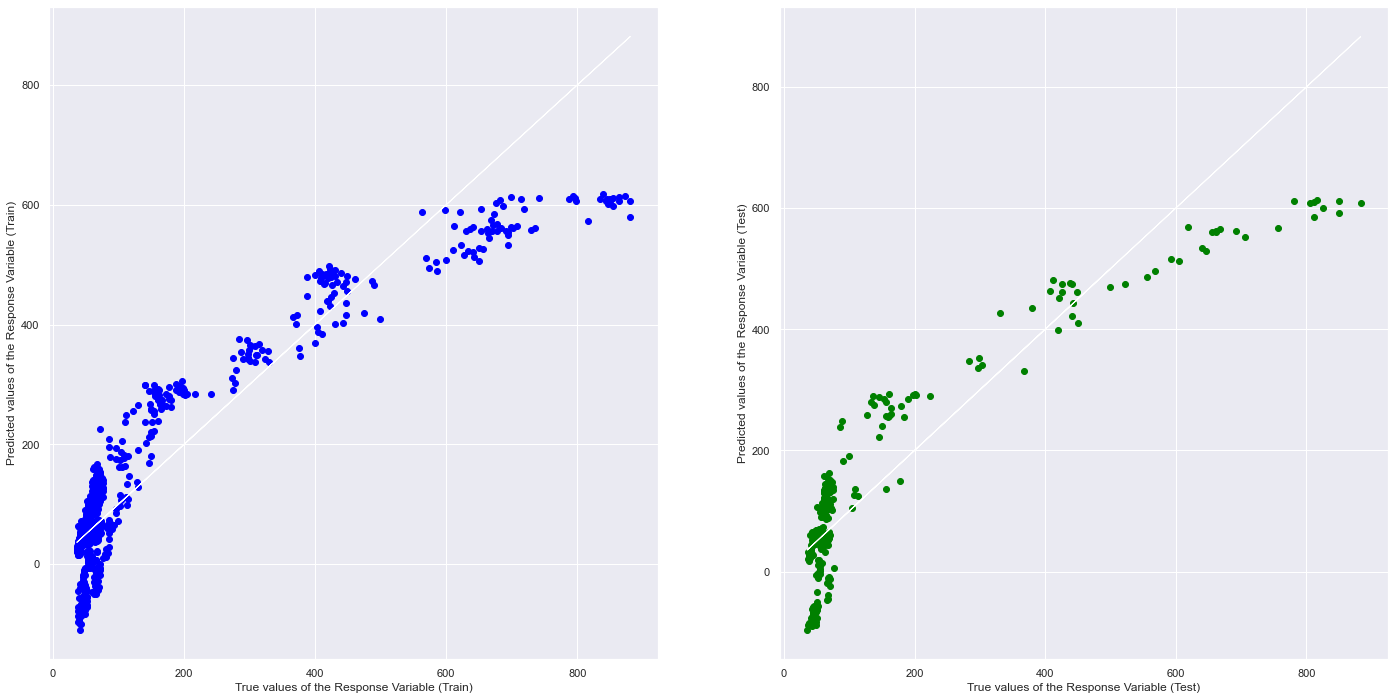

In [25]:
for i in range(10):
    print('Variable', i)
    X_train = pd.DataFrame(Xreg_train.iloc[:,i])
    X_test = pd.DataFrame(Xreg_test.iloc[:,i])
    f, axes = plt.subplots(2, 3, figsize=(24, 12))
    sb.boxplot(data = X_train, orient = "h", ax = axes[0,0])
    sb.histplot(data = X_train, ax = axes[0,1])
    sb.violinplot(data = X_train, orient = "h", ax = axes[0,2])
    sb.boxplot(data = yreg_train, orient = "h", ax = axes[1,0])
    sb.histplot(data = yreg_train, ax = axes[1,1])
    sb.violinplot(data = yreg_train, orient = "h", ax = axes[1,2])
    linreg = LinearRegression()         
    linreg.fit(X_train, yreg_train) 
    print('Intercept of Regression \t: b = ', linreg.intercept_)
    print('Coefficients of Regression \t: a = ', linreg.coef_)
    print()
    regline_x = X_train
    regline_y = linreg.intercept_ + linreg.coef_ * X_train
    f = plt.figure(figsize=(16, 8))
    plt.scatter(X_train, yreg_train)
    plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
    plt.show()
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_train, yreg_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(yreg_train, y_train_pred))
    print()
    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_test, yreg_test))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(yreg_test, y_test_pred))
    print()
    f, axes = plt.subplots(1, 2, figsize=(24, 12))
    axes[0].scatter(yreg_train, y_train_pred, color = "blue")
    axes[0].plot(yreg_train, yreg_train, 'w-', linewidth = 1)
    axes[0].set_xlabel("True values of the Response Variable (Train)")
    axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
    axes[1].scatter(yreg_test, y_test_pred, color = "green")
    axes[1].plot(yreg_test, yreg_test, 'w-', linewidth = 1)
    axes[1].set_xlabel("True values of the Response Variable (Test)")
    axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
    plt.show()

## Multivari adjusted price vs ( SMA(0.93), EMA (0.94), KAMA(0.96) , T3(0.88)

In [26]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Import the required function from sklearn
from sklearn.model_selection import train_test_split


X_train = pd.DataFrame(Xreg_train[['SMA','EMA','KAMA','T3']])
X_test = pd.DataFrame(Xreg_test[['SMA','EMA','KAMA','T3']])

# Check the sample sizes
print("Train Set :", X_train.shape, yreg_train.shape)
print("Test Set  :", X_test.shape, yreg_test.shape)

# Create a Linear Regression object
linreg = LinearRegression()

# Train the Linear Regression model
linreg.fit(X_train, yreg_train) 

Train Set : (956, 4) (956, 1)
Test Set  : (319, 4) (319, 1)


LinearRegression()

In [27]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [15.3076179]
Coefficients 	: a =  [[-7.33176621  6.33265051  0.77267023  0.97938233]]


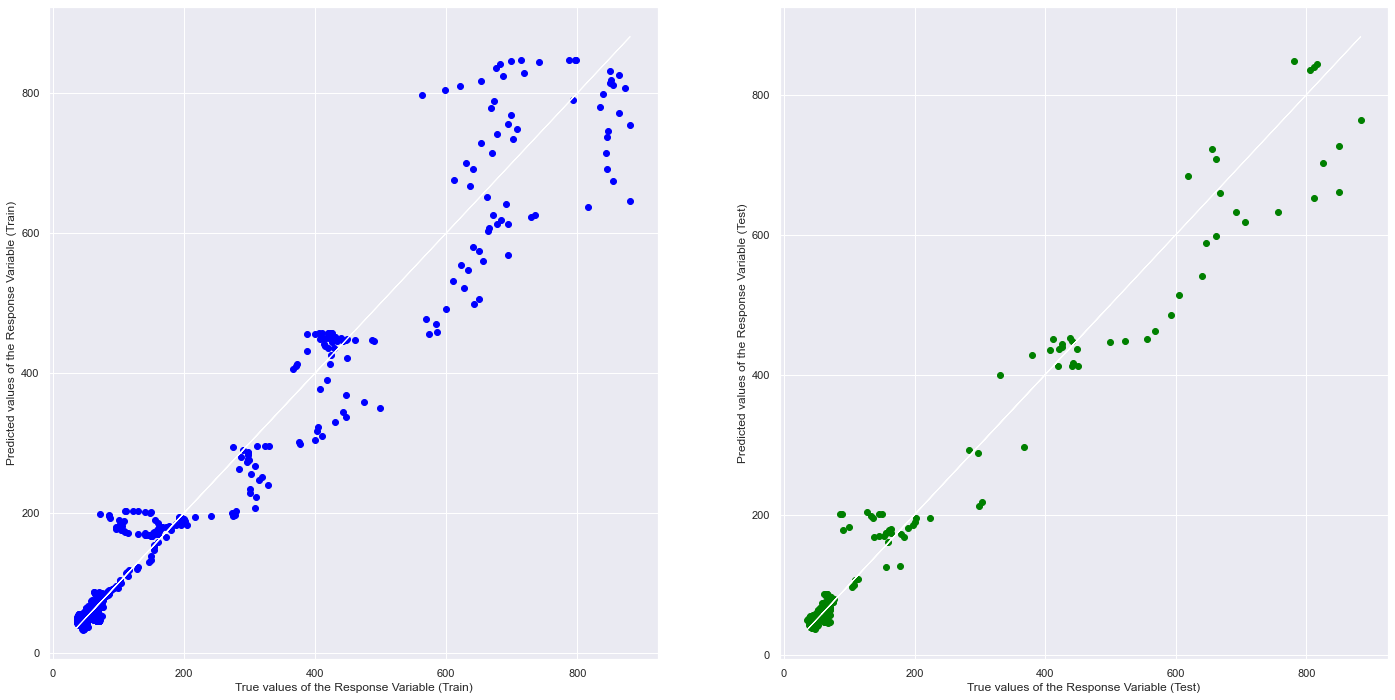

Explained Variance (R^2) on Train Set 	: 0.961950640540196
Mean Squared Error (MSE) on Train Set 	: 1340.3609342525506
Mean Squared Error (MSE) on Test Set 	: 1064.7602353650993


In [28]:
# Predict SalePrice values corresponding to Predictors
yreg_train_pred = linreg.predict(X_train)
yreg_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(yreg_train, yreg_train_pred, color = "blue")
axes[0].plot(yreg_train, yreg_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(yreg_test, yreg_test_pred, color = "green")
axes[1].plot(yreg_test, yreg_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

print("Explained Variance (R^2) on Train Set \t:", linreg.score(X_train, yreg_train))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(yreg_train, yreg_train_pred))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(yreg_test, yreg_test_pred))

## Multivari adjusted price vs ( SMA(0.93), EMA (0.94), KAMA(0.96) , T3(0.88), ADX(0.84), OBV(0.83))

In [29]:
X_train = pd.DataFrame(Xreg_train[['SMA','EMA','KAMA','T3','ADX','OBV']])
X_test = pd.DataFrame(Xreg_test[['SMA','EMA','KAMA','T3','ADX','OBV']])

# Check the sample sizes
print("Train Set :", X_train.shape, yreg_train.shape)
print("Test Set  :", X_test.shape, yreg_test.shape)

# Create a Linear Regression object
linreg = LinearRegression()

# Train the Linear Regression model
linreg.fit(X_train, yreg_train) 

Train Set : (956, 6) (956, 1)
Test Set  : (319, 6) (319, 1)


LinearRegression()

In [30]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [-107.93283885]
Coefficients 	: a =  [[-1.22857450e+01  6.65170517e+00  1.02867024e+00  5.82643926e+00
   1.34131065e+01  1.61133494e-08]]


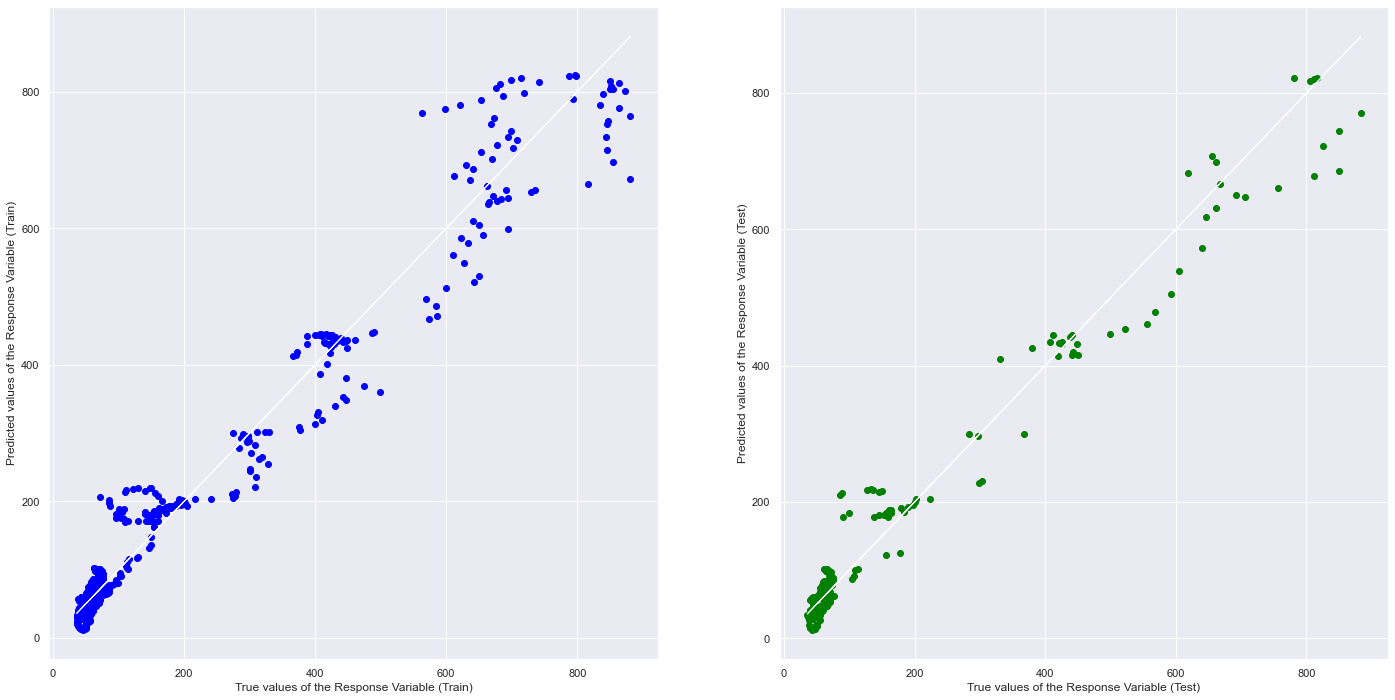

Explained Variance (R^2) on Train Set 	: 0.9680033906444172
Mean Squared Error (MSE) on Train Set 	: 1127.141319003528
Mean Squared Error (MSE) on Test Set 	: 996.1858041991704


In [31]:
# Predict SalePrice values corresponding to Predictors
yreg_train_pred = linreg.predict(X_train)
yreg_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(yreg_train, yreg_train_pred, color = "blue")
axes[0].plot(yreg_train, yreg_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(yreg_test, yreg_test_pred, color = "green")
axes[1].plot(yreg_test, yreg_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

print("Explained Variance (R^2) on Train Set \t:", linreg.score(X_train, yreg_train))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(yreg_train, yreg_train_pred))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(yreg_test, yreg_test_pred))

## Multivariate adjusted price vs ALL

In [32]:
X_train = pd.DataFrame(Xreg_train[['SMA','EMA','KAMA','T3','RSI','ADX','CCI','ROC','Chaikin A/D','OBV']])
X_test = pd.DataFrame(Xreg_test[['SMA','EMA','KAMA','T3','RSI','ADX','CCI','ROC','Chaikin A/D','OBV']])

# Check the sample sizes
print("Train Set :", X_train.shape, yreg_train.shape)
print("Test Set  :", X_test.shape, yreg_test.shape)

# Create a Linear Regression object
linreg = LinearRegression()

# Train the Linear Regression model
linreg.fit(X_train, yreg_train) 

Train Set : (956, 10) (956, 1)
Test Set  : (319, 10) (319, 1)


LinearRegression()

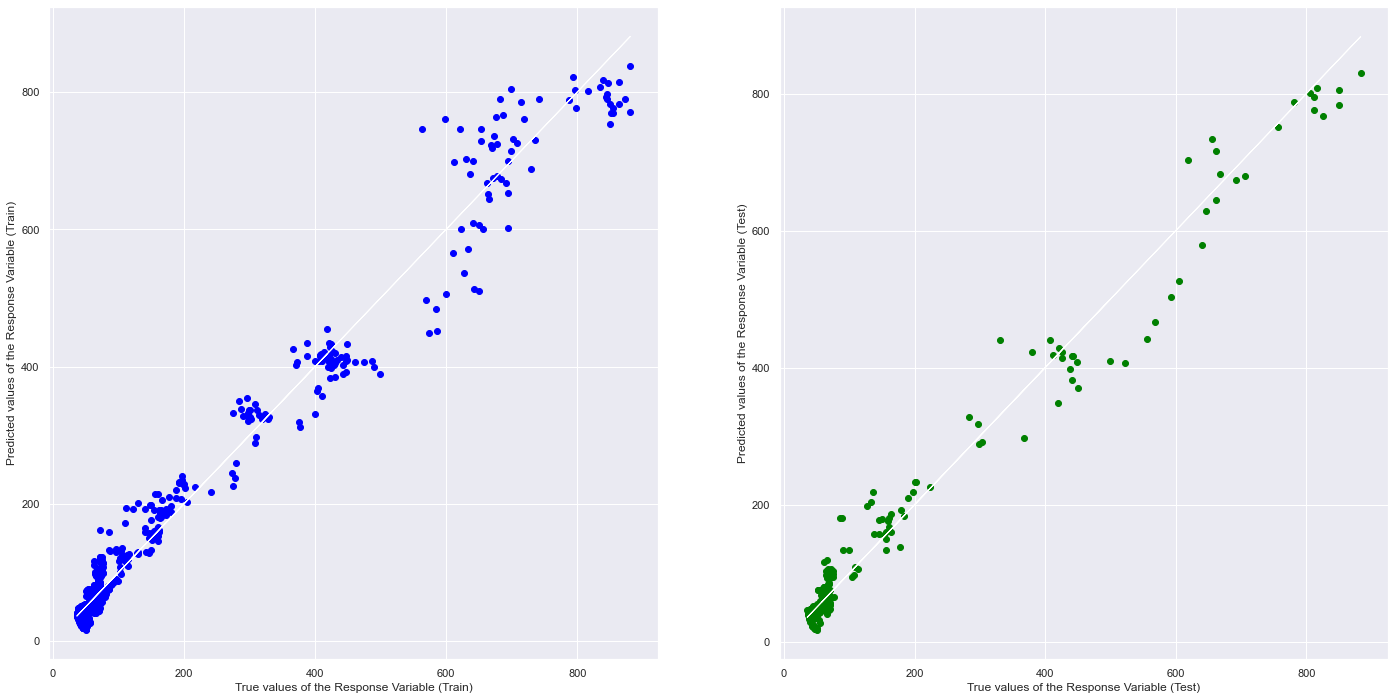

Explained Variance (R^2) on Train Set 	: 0.9786107297456863
Mean Squared Error (MSE) on Train Set 	: 753.4776581807918
Mean Squared Error (MSE) on Test Set 	: 740.4524227018694


In [33]:
# Predict SalePrice values corresponding to Predictors
yreg_train_pred = linreg.predict(X_train)
yreg_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(yreg_train, yreg_train_pred, color = "blue")
axes[0].plot(yreg_train, yreg_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(yreg_test, yreg_test_pred, color = "green")
axes[1].plot(yreg_test, yreg_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

print("Explained Variance (R^2) on Train Set \t:", linreg.score(X_train, yreg_train))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(yreg_train, yreg_train_pred))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(yreg_test, yreg_test_pred))

In [34]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [-482.94441014]
Coefficients 	: a =  [[-1.27994132e+01  9.17502237e+00 -8.23110690e-02  5.64910880e+00
   8.59640903e+00  8.07282750e+00 -1.30990219e-01  2.83049747e-01
  -2.03909979e-08 -2.25593042e-08]]


# price prediction using regression

In [35]:
main_data.loc['2017-01-19'][0]

48.752

## predictedprice on 2021-01-22

In [36]:
predictedprice_= linreg.coef_[0][0]*TI_data.loc['2021-01-22'][0] + linreg.coef_[0][1]*TI_data.loc['2021-01-22'][1] +linreg.coef_[0][2]*TI_data.loc['2021-01-22'][2]+linreg.coef_[0][3]*TI_data.loc['2021-01-22'][3]+linreg.coef_[0][4]*TI_data.loc['2021-01-22'][4]+linreg.coef_[0][5]*TI_data.loc['2021-01-22'][5]+linreg.coef_[0][6]*TI_data.loc['2021-01-22'][6]+linreg.coef_[0][7]*TI_data.loc['2021-01-22'][7]+linreg.coef_[0][8]*TI_data.loc['2021-01-22'][8]+linreg.coef_[0][9]*TI_data.loc['2021-01-22'][9] + linreg.intercept_[0] 

In [37]:
predictedprice_

807.5008973037026

## price expect to decrease on 2021-01-22


In [38]:
predictedprice_ - main_data.loc['2021-01-15'][0]

-18.659102696297396

## predicted price on 2017-01-19

In [39]:
predictedprice2_= linreg.coef_[0][0]*TI_data.loc['2017-01-19'][0] + linreg.coef_[0][1]*TI_data.loc['2017-01-19'][1] +linreg.coef_[0][2]*TI_data.loc['2017-01-19'][2]+linreg.coef_[0][3]*TI_data.loc['2017-01-19'][3]+linreg.coef_[0][4]*TI_data.loc['2017-01-19'][4]+linreg.coef_[0][5]*TI_data.loc['2017-01-19'][5]+linreg.coef_[0][6]*TI_data.loc['2017-01-19'][6]+linreg.coef_[0][7]*TI_data.loc['2017-01-19'][7]+linreg.coef_[0][8]*TI_data.loc['2017-01-19'][8]+linreg.coef_[0][9]*TI_data.loc['2017-01-19'][9] + linreg.intercept_[0] 

In [40]:
predictedprice2_

16.97266883684142

## price expected to decrease on 2017-01-19

In [41]:
 predictedprice2_ - main_data.loc['2017-01-13'][0]

-30.577331163158576

# Random Forrest Classification

### Visualisation of data set

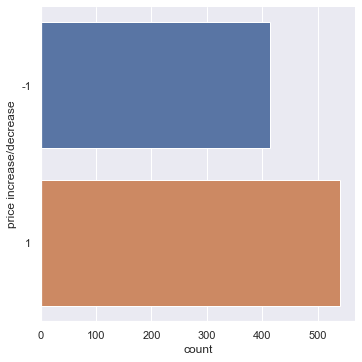

In [116]:
# Shows Distribution of price change on the train data
sb.catplot(y = "price increase/decrease", data = ycls_train, kind = "count")

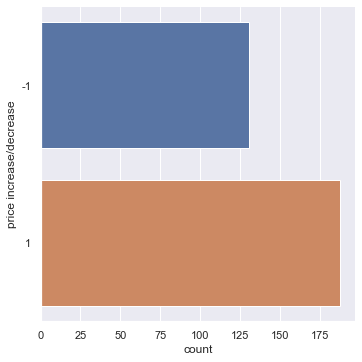

In [117]:
# Shows Distribution of price change on the test data
sb.catplot(y = "price increase/decrease", data = ycls_test, kind = "count")

C:\Users\Zheng Jie\Anaconda3.8\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 61.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Zheng Jie\Anaconda3.8\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 59.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Zheng Jie\Anaconda3.8\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 61.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Zheng Jie\Anaconda3.8\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 60.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Zheng Jie\Anaconda3.8\lib\site-packages\seaborn\categorical.py:1296: Us

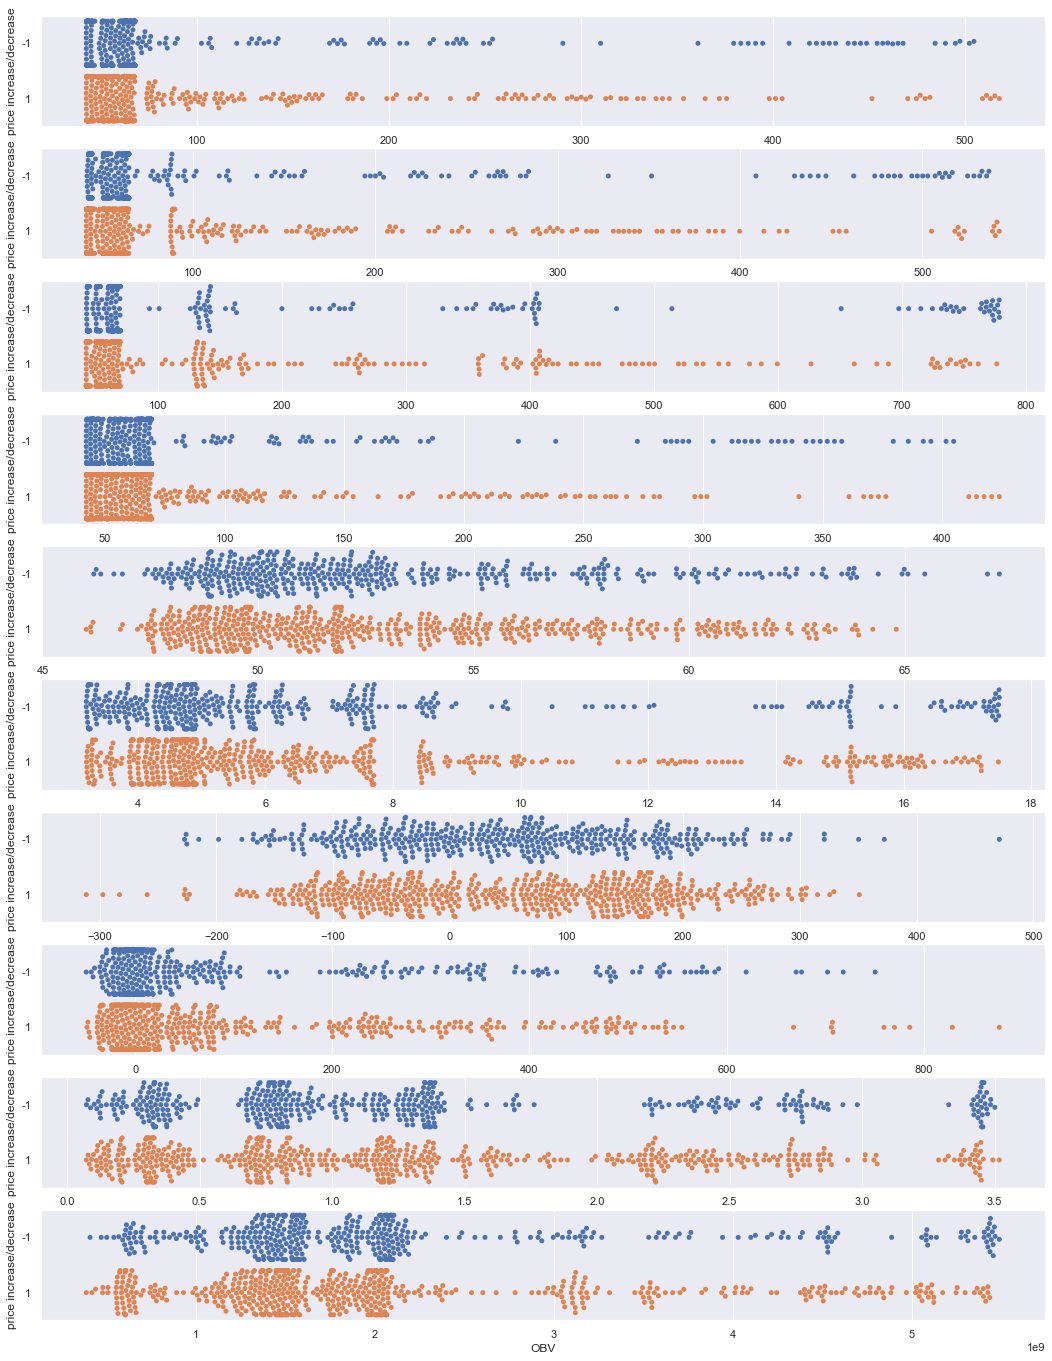

In [118]:
trainDF = pd.concat([ycls_train, Xcls_train], axis = 1).reindex(ycls_train.index)

f, axes = plt.subplots(10, 1, figsize=(18, 24))

count = 0
for var in Xcls_train:
    sb.swarmplot(x = var, y = "price increase/decrease", data = trainDF, orient = "h", ax = axes[count])
    count += 1

## Univariate random forrest for all TIs

In [115]:
TI_names = ['SMA','EMA','KAMA','T3','RSI','ADX','CCI','ROC','Chaikin A/D','OBV']
for i in range(10):
    print('Variable:', TI_names[i])
    X_train = pd.DataFrame(Xcls_train.iloc[:,i])
    X_test = pd.DataFrame(Xcls_test.iloc[:,i])
    # Import RandomForestClassifier model from Scikit-Learn
    from sklearn.ensemble import RandomForestClassifier

    # Create the Random Forest object
    rforest = RandomForestClassifier(n_estimators = 100,  # n_estimators denote number of trees
                                 max_depth = 4)       # set the maximum depth of each tree

    # Fit Random Forest on Train Data
    rforest.fit(X_train, ycls_train)
    
    # Import confusion_matrix from Scikit-Learn
    from sklearn.metrics import confusion_matrix

    # Predict Legendary values corresponding to Total
    y_train_pred = rforest.predict(X_train)
    y_test_pred = rforest.predict(X_test)

    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Classification Accuracy \t:", rforest.score(X_train, ycls_train))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Classification Accuracy \t:", rforest.score(X_test, ycls_test))
    print()

    

Variable: SMA


<ipython-input-115-be1ebdeee5c6>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rforest.fit(X_train, ycls_train)


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6973821989528796

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6206896551724138

Variable: EMA


<ipython-input-115-be1ebdeee5c6>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rforest.fit(X_train, ycls_train)


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.669109947643979

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6112852664576802

Variable: KAMA


<ipython-input-115-be1ebdeee5c6>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rforest.fit(X_train, ycls_train)


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.631413612565445

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6300940438871473

Variable: T3


<ipython-input-115-be1ebdeee5c6>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rforest.fit(X_train, ycls_train)


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6774869109947644

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6050156739811913

Variable: RSI


<ipython-input-115-be1ebdeee5c6>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rforest.fit(X_train, ycls_train)


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6376963350785341

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5987460815047022

Variable: ADX


<ipython-input-115-be1ebdeee5c6>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rforest.fit(X_train, ycls_train)


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6303664921465969

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5956112852664577

Variable: CCI


<ipython-input-115-be1ebdeee5c6>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rforest.fit(X_train, ycls_train)


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6324607329842932

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5579937304075235

Variable: ROC


<ipython-input-115-be1ebdeee5c6>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rforest.fit(X_train, ycls_train)


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6649214659685864

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5799373040752351

Variable: Chaikin A/D


<ipython-input-115-be1ebdeee5c6>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rforest.fit(X_train, ycls_train)


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6345549738219896

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6269592476489029

Variable: OBV


<ipython-input-115-be1ebdeee5c6>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rforest.fit(X_train, ycls_train)


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6115183246073298

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5893416927899686



## Mulit-variate Random forrest classification

In [119]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 100,  # n_estimators denote number of trees
                                 max_depth = 4)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(Xcls_train, ycls_train)

<ipython-input-119-99519115257a>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rforest.fit(Xcls_train, ycls_train)


RandomForestClassifier(max_depth=4)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7570680628272252

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.664576802507837



<AxesSubplot:>

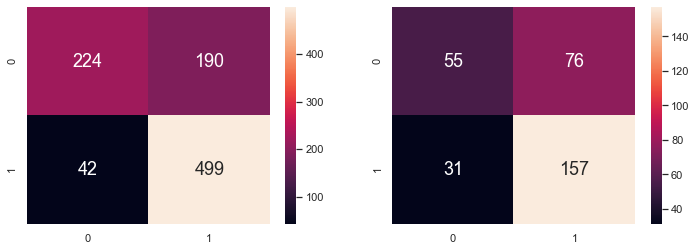

In [120]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict Legendary values corresponding to Total
y_train_pred = rforest.predict(Xcls_train)
y_test_pred = rforest.predict(Xcls_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(Xcls_train, ycls_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rforest.score(Xcls_test, ycls_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(ycls_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(ycls_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

### Comments on which model to use
As the classificaion accuracy for both train and test is higher for multi-variate as compared to uni-variate, the multi-variate model should be used.

## Prediction of price change

In [121]:
import datetime

a = datetime.date(2016, 1, 11)
b = datetime.date(2017, 1, 19)
c = datetime.date(2021, 1, 22)
print(a,b,c)

2016-01-11 2017-01-19 2021-01-22


In [223]:
# Extract Pokemons for Prediction

data_pred = data_buysell[data_buysell["TradeDate"].isin([a,b,c])]

data_pred

,price increase/decrease,adjusted close,SMA,EMA,KAMA,T3,RSI,ADX,CCI,ROC,Chaikin A/D,OBV,TradeDate
2016-01-11,-1,41.570,47.4838,46.3239,46.8686,49.7785,49.2243,5.9317,-110.1701,9.1620,3.442200e+08,1.223932e+09,2016-01-11
2017-01-19,1,48.752,42.8616,42.1971,42.4625,42.7503,52.1434,4.0224,134.0922,-4.5837,2.868685e+08,1.447354e+09,2017-01-19
2021-01-22,-1,846.640,383.2638,434.0539,705.2798,286.6789,63.1146,16.9379,198.7018,676.0931,3.438953e+09,5.425571e+09,2021-01-22


In [224]:
predictors = ['SMA','EMA','KAMA','T3','RSI','ADX','CCI','ROC','Chaikin A/D','OBV']
X_pred = pd.DataFrame(data_pred[predictors])

# Predict Response corresponding to Predictors
y_pred = rforest.predict(X_pred)
y_pred

array([ 1,  1, -1])

In [225]:
# Summarize the Actuals and Predictions
y_pred = pd.DataFrame(y_pred, columns = ["PredY"], index = data_pred.index)
data_acc = pd.concat([data_pred[["TradeDate", "price increase/decrease"]], y_pred], axis = 1)

data_acc

,TradeDate,price increase/decrease,PredY
2016-01-11,2016-01-11,-1,1
2017-01-19,2017-01-19,1,1
2021-01-22,2021-01-22,-1,-1


In [226]:
# Predict Probabilities corresponding to Predictors
y_prob = rforest.predict_proba(X_pred)
y_prob

array([[0.47527696, 0.52472304],
       [0.20750474, 0.79249526],
       [0.52729649, 0.47270351]])

In [227]:
# Summarize the Probabilities with the Predictions
y_prob = pd.DataFrame(list(y_prob[:,1]), columns = ["price increase/decrease"], index = data_pred.index)
pkmndata_conf = pd.concat([data_acc, y_prob], axis = 1)

pkmndata_conf

,TradeDate,price increase/decrease,PredY,price increase/decrease
2016-01-11,2016-01-11,-1,1,0.524723
2017-01-19,2017-01-19,1,1,0.792495
2021-01-22,2021-01-22,-1,-1,0.472704
